# Multi-armed bandits

River has a `bandit` module. It contains several multi-armed bandit policies, bandit environments, and utilities to benchmark policies on bandit problems.

Bandit environments in River implement the [Gym](https://www.gymlibrary.dev/) interface. You can thus load them with `gym.make`. Note that Gym is intended for reinforcement learning algorithms, while bandit policies are the simplest form of reinforcement learing. Bandit policies learn by receiving a reward after each step, while reinforcement learning algorithms have to learn from feedback that may arrive at the end of a (long) sequence of steps.

In [1]:
import gymnasium as gym

for k in gym.envs.registry:
    if k.startswith('river_bandits'):
        print(k)


River's bandit module offers the `bandit.evaluate` function to benchmark several policies on a given environment. It takes as input a list of bandit policies, a bandit environment (the problem to solve), and a reward object.

In [2]:
import gymnasium as gym
from river import bandit
import pandas as pd
from tqdm import tqdm
from river import stats

policies=[
    bandit.EpsilonGreedy(epsilon=0.1),
    bandit.EpsilonGreedy(epsilon=0.01),
    bandit.EpsilonGreedy(epsilon=0),
]

env = gym.make(
    'river_bandits/KArmedTestbed-v0',
    max_episode_steps=1000
)

trace = bandit.evaluate(
    policies=policies,
    env=env,
    reward_stat=stats.Mean(),
    n_episodes=(n_episodes := 2000),
)


The `bandit.evaluate` function returns a generator containing the results at each step of the benchmark. This can be wrapped with a `pandas.DataFrame` to gather all the results.

In [3]:
trace_df = pd.DataFrame(tqdm(
    trace, position=0, total=(
        n_episodes *
        len(policies) *
        env._max_episode_steps
    )
))
trace_df.sample(5, random_state=42)


  0%|          | 0/6000000 [00:00<?, ?it/s]

  0%|          | 11606/6000000 [00:00<00:51, 116054.58it/s]

  0%|          | 23860/6000000 [00:00<00:49, 119865.49it/s]

  1%|          | 35850/6000000 [00:00<00:49, 119880.26it/s]

  1%|          | 47839/6000000 [00:00<00:49, 119795.07it/s]

  1%|          | 59886/6000000 [00:00<00:49, 120036.21it/s]

  1%|          | 71890/6000000 [00:00<00:49, 119392.31it/s]

  1%|▏         | 83945/6000000 [00:00<00:49, 119768.53it/s]

  2%|▏         | 96001/6000000 [00:00<00:49, 119789.81it/s]

  2%|▏         | 108001/6000000 [00:00<00:49, 119747.69it/s]

  2%|▏         | 120001/6000000 [00:01<00:49, 119462.30it/s]

  2%|▏         | 132001/6000000 [00:01<00:49, 119609.72it/s]

  2%|▏         | 144056/6000000 [00:01<00:48, 119892.36it/s]

  3%|▎         | 156046/6000000 [00:01<00:48, 119800.24it/s]

  3%|▎         | 168027/6000000 [00:01<00:48, 119662.77it/s]

  3%|▎         | 180001/6000000 [00:01<00:48, 119515.91it/s]

  3%|▎         | 192001/6000000 [00:01<00:48, 119344.26it/s]

  3%|▎         | 204019/6000000 [00:01<00:48, 119590.16it/s]

  4%|▎         | 216001/6000000 [00:01<00:48, 119638.65it/s]

  4%|▍         | 228084/6000000 [00:01<00:48, 119992.55it/s]

  4%|▍         | 240084/6000000 [00:02<00:48, 119584.75it/s]

  4%|▍         | 252109/6000000 [00:02<00:47, 119781.75it/s]

  4%|▍         | 264088/6000000 [00:02<00:47, 119554.68it/s]

  5%|▍         | 276044/6000000 [00:02<00:48, 117902.12it/s]

  5%|▍         | 288241/6000000 [00:02<00:47, 119107.58it/s]

  5%|▌         | 300157/6000000 [00:02<00:48, 118083.95it/s]

  5%|▌         | 312138/6000000 [00:02<00:47, 118592.49it/s]

  5%|▌         | 324050/6000000 [00:02<00:47, 118748.45it/s]

  6%|▌         | 336152/6000000 [00:02<00:47, 119423.33it/s]

  6%|▌         | 348215/6000000 [00:02<00:47, 119781.23it/s]

  6%|▌         | 360234/6000000 [00:03<00:47, 119901.40it/s]

  6%|▌         | 372226/6000000 [00:03<00:47, 119535.25it/s]

  6%|▋         | 384181/6000000 [00:03<00:47, 119432.87it/s]

  7%|▋         | 396126/6000000 [00:03<00:47, 118333.76it/s]

  7%|▋         | 408001/6000000 [00:03<00:47, 118167.85it/s]

  7%|▋         | 420003/6000000 [00:03<00:47, 118696.95it/s]

  7%|▋         | 432002/6000000 [00:03<00:46, 119060.71it/s]

  7%|▋         | 444003/6000000 [00:03<00:46, 119308.34it/s]

  8%|▊         | 455935/6000000 [00:03<00:46, 119073.19it/s]

  8%|▊         | 467844/6000000 [00:03<00:55, 100329.49it/s]

  8%|▊         | 479949/6000000 [00:04<00:52, 105810.62it/s]

  8%|▊         | 491780/6000000 [00:04<00:50, 109237.87it/s]

  8%|▊         | 503757/6000000 [00:04<00:48, 112200.50it/s]

  9%|▊         | 515745/6000000 [00:04<00:47, 114401.37it/s]

  9%|▉         | 527748/6000000 [00:04<00:47, 116036.51it/s]

  9%|▉         | 539727/6000000 [00:04<00:46, 117135.51it/s]

  9%|▉         | 551673/6000000 [00:04<00:46, 117818.99it/s]

  9%|▉         | 563791/6000000 [00:04<00:45, 118811.51it/s]

 10%|▉         | 575748/6000000 [00:04<00:45, 119036.07it/s]

 10%|▉         | 587687/6000000 [00:04<00:45, 118825.82it/s]

 10%|▉         | 599854/6000000 [00:05<00:45, 119672.33it/s]

 10%|█         | 612001/6000000 [00:05<00:44, 119928.51it/s]

 10%|█         | 624007/6000000 [00:05<00:45, 117565.54it/s]

 11%|█         | 636002/6000000 [00:05<00:45, 118267.46it/s]

 11%|█         | 648331/6000000 [00:05<00:44, 119753.41it/s]

 11%|█         | 660318/6000000 [00:05<00:44, 119581.12it/s]

 11%|█         | 672285/6000000 [00:05<00:44, 119314.81it/s]

 11%|█▏        | 684382/6000000 [00:05<00:44, 119804.22it/s]

 12%|█▏        | 696367/6000000 [00:05<00:44, 119525.23it/s]

 12%|█▏        | 708323/6000000 [00:05<00:44, 119528.41it/s]

 12%|█▏        | 720431/6000000 [00:06<00:43, 119991.49it/s]

 12%|█▏        | 732464/6000000 [00:06<00:43, 120091.28it/s]

 12%|█▏        | 744475/6000000 [00:06<00:44, 118783.13it/s]

 13%|█▎        | 756358/6000000 [00:06<00:47, 111065.38it/s]

 13%|█▎        | 768154/6000000 [00:06<00:46, 113022.34it/s]

 13%|█▎        | 780126/6000000 [00:06<00:45, 114953.62it/s]

 13%|█▎        | 792003/6000000 [00:06<00:44, 116021.70it/s]

 13%|█▎        | 804130/6000000 [00:06<00:44, 117564.96it/s]

 14%|█▎        | 816117/6000000 [00:06<00:43, 118246.10it/s]

 14%|█▍        | 828261/6000000 [00:07<00:43, 119194.54it/s]

 14%|█▍        | 840436/6000000 [00:07<00:43, 119954.79it/s]

 14%|█▍        | 852454/6000000 [00:07<00:42, 120020.96it/s]

 14%|█▍        | 864466/6000000 [00:07<00:42, 119548.10it/s]

 15%|█▍        | 876533/6000000 [00:07<00:42, 119879.62it/s]

 15%|█▍        | 888527/6000000 [00:07<00:42, 119808.99it/s]

 15%|█▌        | 900512/6000000 [00:07<00:42, 118642.01it/s]

 15%|█▌        | 912382/6000000 [00:07<00:42, 118656.09it/s]

 15%|█▌        | 924269/6000000 [00:07<00:42, 118717.61it/s]

 16%|█▌        | 936319/6000000 [00:07<00:42, 119246.31it/s]

 16%|█▌        | 948456/6000000 [00:08<00:42, 119880.66it/s]

 16%|█▌        | 960490/6000000 [00:08<00:41, 120016.99it/s]

 16%|█▌        | 972493/6000000 [00:08<00:42, 119662.18it/s]

 16%|█▋        | 984624/6000000 [00:08<00:41, 120154.21it/s]

 17%|█▋        | 996641/6000000 [00:08<00:41, 119750.90it/s]

 17%|█▋        | 1008651/6000000 [00:08<00:41, 119854.48it/s]

 17%|█▋        | 1020784/6000000 [00:08<00:41, 120293.20it/s]

 17%|█▋        | 1032814/6000000 [00:08<00:41, 120025.63it/s]

 17%|█▋        | 1044832/6000000 [00:08<00:41, 120071.07it/s]

 18%|█▊        | 1056882/6000000 [00:08<00:41, 120197.63it/s]

 18%|█▊        | 1068903/6000000 [00:09<00:41, 120154.34it/s]

 18%|█▊        | 1080919/6000000 [00:09<00:40, 120122.95it/s]

 18%|█▊        | 1092932/6000000 [00:09<00:40, 120080.06it/s]

 18%|█▊        | 1104941/6000000 [00:09<00:40, 119901.70it/s]

 19%|█▊        | 1116932/6000000 [00:09<00:40, 119638.40it/s]

 19%|█▉        | 1128897/6000000 [00:09<00:40, 119564.47it/s]

 19%|█▉        | 1140983/6000000 [00:09<00:40, 119949.06it/s]

 19%|█▉        | 1152979/6000000 [00:09<00:40, 119832.75it/s]

 19%|█▉        | 1164963/6000000 [00:09<00:40, 119026.60it/s]

 20%|█▉        | 1176867/6000000 [00:09<00:40, 118881.12it/s]

 20%|█▉        | 1188802/6000000 [00:10<00:40, 119020.68it/s]

 20%|██        | 1200725/6000000 [00:10<00:40, 119081.41it/s]

 20%|██        | 1212912/6000000 [00:10<00:39, 119913.51it/s]

 20%|██        | 1225082/6000000 [00:10<00:39, 120446.82it/s]

 21%|██        | 1237128/6000000 [00:10<00:39, 120393.35it/s]

 21%|██        | 1249168/6000000 [00:10<00:39, 120341.39it/s]

 21%|██        | 1261475/6000000 [00:10<00:39, 121157.84it/s]

 21%|██        | 1273592/6000000 [00:10<00:39, 120893.94it/s]

 21%|██▏       | 1285703/6000000 [00:10<00:38, 120958.05it/s]

 22%|██▏       | 1297800/6000000 [00:10<00:38, 120747.88it/s]

 22%|██▏       | 1309882/6000000 [00:11<00:38, 120768.56it/s]

 22%|██▏       | 1321960/6000000 [00:11<00:38, 120702.20it/s]

 22%|██▏       | 1334031/6000000 [00:11<00:38, 120643.31it/s]

 22%|██▏       | 1346096/6000000 [00:11<00:38, 120636.22it/s]

 23%|██▎       | 1358160/6000000 [00:11<00:38, 120174.83it/s]

 23%|██▎       | 1370178/6000000 [00:11<00:38, 119844.95it/s]

 23%|██▎       | 1382163/6000000 [00:11<00:38, 119828.23it/s]

 23%|██▎       | 1394274/6000000 [00:11<00:38, 120211.16it/s]

 23%|██▎       | 1406296/6000000 [00:11<00:38, 119075.42it/s]

 24%|██▎       | 1418206/6000000 [00:11<00:38, 118725.32it/s]

 24%|██▍       | 1430087/6000000 [00:12<00:38, 118748.96it/s]

 24%|██▍       | 1442095/6000000 [00:12<00:38, 119144.67it/s]

 24%|██▍       | 1454038/6000000 [00:12<00:38, 119229.37it/s]

 24%|██▍       | 1465962/6000000 [00:12<00:38, 118409.83it/s]

 25%|██▍       | 1477941/6000000 [00:12<00:38, 118819.86it/s]

 25%|██▍       | 1489886/6000000 [00:12<00:37, 119006.18it/s]

 25%|██▌       | 1501919/6000000 [00:12<00:37, 119400.59it/s]

 25%|██▌       | 1513860/6000000 [00:12<00:37, 118466.36it/s]

 25%|██▌       | 1525972/6000000 [00:12<00:37, 119255.96it/s]

 26%|██▌       | 1537953/6000000 [00:12<00:37, 119420.86it/s]

 26%|██▌       | 1549897/6000000 [00:13<00:37, 119265.87it/s]

 26%|██▌       | 1561890/6000000 [00:13<00:37, 119463.44it/s]

 26%|██▌       | 1573838/6000000 [00:13<00:37, 119396.61it/s]

 26%|██▋       | 1585779/6000000 [00:13<00:37, 118502.98it/s]

 27%|██▋       | 1597632/6000000 [00:13<00:37, 117808.44it/s]

 27%|██▋       | 1609653/6000000 [00:13<00:37, 118521.29it/s]

 27%|██▋       | 1621900/6000000 [00:13<00:36, 119695.41it/s]

 27%|██▋       | 1633880/6000000 [00:13<00:36, 119725.49it/s]

 27%|██▋       | 1645854/6000000 [00:13<00:36, 119363.11it/s]

 28%|██▊       | 1657944/6000000 [00:13<00:36, 119819.75it/s]

 28%|██▊       | 1669949/6000000 [00:14<00:36, 119886.43it/s]

 28%|██▊       | 1682045/6000000 [00:14<00:35, 120207.08it/s]

 28%|██▊       | 1694067/6000000 [00:14<00:36, 117682.76it/s]

 28%|██▊       | 1705848/6000000 [00:14<00:37, 114124.93it/s]

 29%|██▊       | 1717288/6000000 [00:14<00:39, 107696.78it/s]

 29%|██▉       | 1729278/6000000 [00:14<00:38, 111126.01it/s]

 29%|██▉       | 1741188/6000000 [00:14<00:37, 113409.35it/s]

 29%|██▉       | 1753308/6000000 [00:14<00:36, 115670.09it/s]

 29%|██▉       | 1765244/6000000 [00:14<00:36, 116749.49it/s]

 30%|██▉       | 1777331/6000000 [00:14<00:35, 117963.74it/s]

 30%|██▉       | 1789191/6000000 [00:15<00:35, 118150.92it/s]

 30%|███       | 1801064/6000000 [00:15<00:35, 118322.64it/s]

 30%|███       | 1812917/6000000 [00:15<00:35, 118381.42it/s]

 30%|███       | 1824799/6000000 [00:15<00:35, 118509.30it/s]

 31%|███       | 1836891/6000000 [00:15<00:34, 119227.92it/s]

 31%|███       | 1848959/6000000 [00:15<00:34, 119661.96it/s]

 31%|███       | 1861089/6000000 [00:15<00:34, 120150.33it/s]

 31%|███       | 1873107/6000000 [00:15<00:34, 119883.85it/s]

 31%|███▏      | 1885098/6000000 [00:15<00:34, 119062.61it/s]

 32%|███▏      | 1897151/6000000 [00:15<00:34, 119497.48it/s]

 32%|███▏      | 1909166/6000000 [00:16<00:34, 119690.00it/s]

 32%|███▏      | 1921211/6000000 [00:16<00:34, 119914.99it/s]

 32%|███▏      | 1933210/6000000 [00:16<00:33, 119934.40it/s]

 32%|███▏      | 1945238/6000000 [00:16<00:33, 120035.29it/s]

 33%|███▎      | 1957243/6000000 [00:16<00:33, 119912.94it/s]

 33%|███▎      | 1969313/6000000 [00:16<00:33, 120146.33it/s]

 33%|███▎      | 1981359/6000000 [00:16<00:33, 120237.70it/s]

 33%|███▎      | 1993384/6000000 [00:16<00:33, 120168.16it/s]

 33%|███▎      | 2005506/6000000 [00:16<00:33, 120482.06it/s]

 34%|███▎      | 2017555/6000000 [00:16<00:33, 120286.47it/s]

 34%|███▍      | 2029611/6000000 [00:17<00:32, 120365.25it/s]

 34%|███▍      | 2041704/6000000 [00:17<00:32, 120533.48it/s]

 34%|███▍      | 2053758/6000000 [00:17<00:32, 120139.65it/s]

 34%|███▍      | 2065773/6000000 [00:17<00:32, 119631.62it/s]

 35%|███▍      | 2077737/6000000 [00:17<00:32, 119398.69it/s]

 35%|███▍      | 2089714/6000000 [00:17<00:32, 119507.79it/s]

 35%|███▌      | 2101696/6000000 [00:17<00:32, 119599.12it/s]

 35%|███▌      | 2113817/6000000 [00:17<00:32, 120080.57it/s]

 35%|███▌      | 2125925/6000000 [00:17<00:32, 120378.55it/s]

 36%|███▌      | 2137964/6000000 [00:18<00:32, 120044.12it/s]

 36%|███▌      | 2149969/6000000 [00:18<00:32, 119984.21it/s]

 36%|███▌      | 2162052/6000000 [00:18<00:31, 120236.79it/s]

 36%|███▌      | 2174076/6000000 [00:18<00:31, 119606.52it/s]

 36%|███▋      | 2186038/6000000 [00:18<00:31, 119603.60it/s]

 37%|███▋      | 2197999/6000000 [00:18<00:32, 117003.43it/s]

 37%|███▋      | 2209923/6000000 [00:18<00:32, 117661.56it/s]

 37%|███▋      | 2222165/6000000 [00:18<00:31, 119070.66it/s]

 37%|███▋      | 2234165/6000000 [00:18<00:31, 119345.02it/s]

 37%|███▋      | 2246106/6000000 [00:18<00:31, 119145.58it/s]

 38%|███▊      | 2258109/6000000 [00:19<00:31, 119406.06it/s]

 38%|███▊      | 2270252/6000000 [00:19<00:31, 120010.02it/s]

 38%|███▊      | 2282324/6000000 [00:19<00:30, 120219.80it/s]

 38%|███▊      | 2294348/6000000 [00:19<00:30, 120074.51it/s]

 38%|███▊      | 2306357/6000000 [00:19<00:30, 120050.31it/s]

 39%|███▊      | 2318363/6000000 [00:19<00:30, 119150.52it/s]

 39%|███▉      | 2330281/6000000 [00:19<00:30, 119132.08it/s]

 39%|███▉      | 2342210/6000000 [00:19<00:30, 119175.70it/s]

 39%|███▉      | 2354129/6000000 [00:19<00:30, 118279.66it/s]

 39%|███▉      | 2366156/6000000 [00:19<00:30, 118868.70it/s]

 40%|███▉      | 2378229/6000000 [00:20<00:30, 119420.81it/s]

 40%|███▉      | 2390173/6000000 [00:20<00:30, 119246.45it/s]

 40%|████      | 2402300/6000000 [00:20<00:30, 119849.16it/s]

 40%|████      | 2414315/6000000 [00:20<00:29, 119937.16it/s]

 40%|████      | 2426327/6000000 [00:20<00:29, 119990.92it/s]

 41%|████      | 2438327/6000000 [00:20<00:30, 118155.23it/s]

 41%|████      | 2450311/6000000 [00:20<00:29, 118653.54it/s]

 41%|████      | 2462437/6000000 [00:20<00:29, 119426.55it/s]

 41%|████      | 2474384/6000000 [00:20<00:29, 119368.32it/s]

 41%|████▏     | 2486351/6000000 [00:20<00:29, 119456.76it/s]

 42%|████▏     | 2498327/6000000 [00:21<00:29, 119543.73it/s]

 42%|████▏     | 2510417/6000000 [00:21<00:29, 119947.17it/s]

 42%|████▏     | 2522478/6000000 [00:21<00:28, 120144.28it/s]

 42%|████▏     | 2534494/6000000 [00:21<00:28, 119647.07it/s]

 42%|████▏     | 2546562/6000000 [00:21<00:28, 119950.96it/s]

 43%|████▎     | 2558558/6000000 [00:21<00:29, 117883.68it/s]

 43%|████▎     | 2570487/6000000 [00:21<00:28, 118298.30it/s]

 43%|████▎     | 2582324/6000000 [00:21<00:28, 118318.04it/s]

 43%|████▎     | 2594377/6000000 [00:21<00:28, 118974.96it/s]

 43%|████▎     | 2606330/6000000 [00:21<00:28, 119138.24it/s]

 44%|████▎     | 2618349/6000000 [00:22<00:28, 119451.45it/s]

 44%|████▍     | 2630416/6000000 [00:22<00:28, 119814.29it/s]

 44%|████▍     | 2642399/6000000 [00:22<00:28, 119815.95it/s]

 44%|████▍     | 2654382/6000000 [00:22<00:27, 119578.78it/s]

 44%|████▍     | 2666379/6000000 [00:22<00:27, 119693.69it/s]

 45%|████▍     | 2678349/6000000 [00:22<00:28, 117546.94it/s]

 45%|████▍     | 2690217/6000000 [00:22<00:28, 117869.00it/s]

 45%|████▌     | 2702011/6000000 [00:22<00:34, 95792.00it/s] 

 45%|████▌     | 2713977/6000000 [00:22<00:32, 101910.28it/s]

 45%|████▌     | 2725851/6000000 [00:23<00:30, 106419.85it/s]

 46%|████▌     | 2737685/6000000 [00:23<00:29, 109719.48it/s]

 46%|████▌     | 2749515/6000000 [00:23<00:28, 112149.76it/s]

 46%|████▌     | 2761535/6000000 [00:23<00:28, 114469.39it/s]

 46%|████▌     | 2773394/6000000 [00:23<00:27, 115669.48it/s]

 46%|████▋     | 2785203/6000000 [00:23<00:27, 116380.19it/s]

 47%|████▋     | 2797268/6000000 [00:23<00:27, 117641.04it/s]

 47%|████▋     | 2809392/6000000 [00:23<00:26, 118707.64it/s]

 47%|████▋     | 2821313/6000000 [00:23<00:26, 118796.17it/s]

 47%|████▋     | 2833303/6000000 [00:23<00:26, 119123.10it/s]

 47%|████▋     | 2845240/6000000 [00:24<00:26, 119007.21it/s]

 48%|████▊     | 2857179/6000000 [00:24<00:26, 119120.73it/s]

 48%|████▊     | 2869189/6000000 [00:24<00:26, 119412.17it/s]

 48%|████▊     | 2881183/6000000 [00:24<00:26, 119567.19it/s]

 48%|████▊     | 2893162/6000000 [00:24<00:25, 119632.45it/s]

 48%|████▊     | 2905130/6000000 [00:24<00:25, 119491.58it/s]

 49%|████▊     | 2917259/6000000 [00:24<00:25, 120027.14it/s]

 49%|████▉     | 2929264/6000000 [00:24<00:25, 119894.05it/s]

 49%|████▉     | 2941654/6000000 [00:24<00:25, 121091.54it/s]

 49%|████▉     | 2953765/6000000 [00:24<00:25, 120742.99it/s]

 49%|████▉     | 2965841/6000000 [00:25<00:25, 120400.41it/s]

 50%|████▉     | 2977882/6000000 [00:25<00:25, 120333.62it/s]

 50%|████▉     | 2989916/6000000 [00:25<00:25, 120044.14it/s]

 50%|█████     | 3001979/6000000 [00:25<00:24, 120218.38it/s]

 50%|█████     | 3014002/6000000 [00:25<00:24, 119887.88it/s]

 50%|█████     | 3025992/6000000 [00:25<00:24, 119486.90it/s]

 51%|█████     | 3037942/6000000 [00:25<00:25, 116243.05it/s]

 51%|█████     | 3049870/6000000 [00:25<00:25, 117132.83it/s]

 51%|█████     | 3061787/6000000 [00:25<00:24, 117731.91it/s]

 51%|█████     | 3073788/6000000 [00:25<00:24, 118407.00it/s]

 51%|█████▏    | 3085789/6000000 [00:26<00:24, 118881.17it/s]

 52%|█████▏    | 3097684/6000000 [00:26<00:24, 118890.15it/s]

 52%|█████▏    | 3109578/6000000 [00:26<00:24, 118788.89it/s]

 52%|█████▏    | 3121489/6000000 [00:26<00:24, 118882.46it/s]

 52%|█████▏    | 3133605/6000000 [00:26<00:23, 119563.24it/s]

 52%|█████▏    | 3145564/6000000 [00:26<00:23, 119323.10it/s]

 53%|█████▎    | 3157498/6000000 [00:26<00:24, 116400.05it/s]

 53%|█████▎    | 3169576/6000000 [00:26<00:24, 117686.93it/s]

 53%|█████▎    | 3181612/6000000 [00:26<00:23, 118475.64it/s]

 53%|█████▎    | 3193680/6000000 [00:26<00:23, 119127.83it/s]

 53%|█████▎    | 3205601/6000000 [00:27<00:23, 119044.77it/s]

 54%|█████▎    | 3217564/6000000 [00:27<00:23, 119217.83it/s]

 54%|█████▍    | 3229607/6000000 [00:27<00:23, 119578.02it/s]

 54%|█████▍    | 3241719/6000000 [00:27<00:22, 120038.41it/s]

 54%|█████▍    | 3253847/6000000 [00:27<00:22, 120409.03it/s]

 54%|█████▍    | 3265890/6000000 [00:27<00:22, 120286.80it/s]

 55%|█████▍    | 3277920/6000000 [00:27<00:22, 119944.77it/s]

 55%|█████▍    | 3289917/6000000 [00:27<00:22, 119950.12it/s]

 55%|█████▌    | 3301983/6000000 [00:27<00:22, 120159.99it/s]

 55%|█████▌    | 3314040/6000000 [00:27<00:22, 120280.68it/s]

 55%|█████▌    | 3326189/6000000 [00:28<00:22, 120641.55it/s]

 56%|█████▌    | 3338400/6000000 [00:28<00:21, 121080.04it/s]

 56%|█████▌    | 3350556/6000000 [00:28<00:21, 121221.21it/s]

 56%|█████▌    | 3362679/6000000 [00:28<00:21, 120624.76it/s]

 56%|█████▌    | 3374743/6000000 [00:28<00:21, 120440.62it/s]

 56%|█████▋    | 3386818/6000000 [00:28<00:21, 120530.55it/s]

 57%|█████▋    | 3398872/6000000 [00:28<00:22, 117932.10it/s]

 57%|█████▋    | 3410843/6000000 [00:28<00:21, 118453.59it/s]

 57%|█████▋    | 3422870/6000000 [00:28<00:21, 118989.07it/s]

 57%|█████▋    | 3434798/6000000 [00:28<00:21, 119074.12it/s]

 57%|█████▋    | 3446921/6000000 [00:29<00:21, 119716.32it/s]

 58%|█████▊    | 3458917/6000000 [00:29<00:21, 119786.08it/s]

 58%|█████▊    | 3470899/6000000 [00:29<00:21, 119671.74it/s]

 58%|█████▊    | 3482869/6000000 [00:29<00:21, 119258.40it/s]

 58%|█████▊    | 3494797/6000000 [00:29<00:21, 119115.69it/s]

 58%|█████▊    | 3506773/6000000 [00:29<00:20, 119305.70it/s]

 59%|█████▊    | 3518705/6000000 [00:29<00:21, 117798.98it/s]

 59%|█████▉    | 3530825/6000000 [00:29<00:20, 118807.66it/s]

 59%|█████▉    | 3542839/6000000 [00:29<00:20, 119203.84it/s]

 59%|█████▉    | 3554763/6000000 [00:29<00:20, 119146.60it/s]

 59%|█████▉    | 3566684/6000000 [00:30<00:20, 119164.13it/s]

 60%|█████▉    | 3578764/6000000 [00:30<00:20, 119650.17it/s]

 60%|█████▉    | 3590868/6000000 [00:30<00:20, 120063.89it/s]

 60%|██████    | 3602876/6000000 [00:30<00:19, 120020.15it/s]

 60%|██████    | 3614879/6000000 [00:30<00:19, 119855.41it/s]

 60%|██████    | 3626866/6000000 [00:30<00:19, 119662.99it/s]

 61%|██████    | 3638833/6000000 [00:30<00:20, 115973.75it/s]

 61%|██████    | 3650870/6000000 [00:30<00:20, 117260.02it/s]

 61%|██████    | 3662826/6000000 [00:30<00:19, 117935.87it/s]

 61%|██████    | 3674916/6000000 [00:30<00:19, 118812.57it/s]

 61%|██████▏   | 3686926/6000000 [00:31<00:19, 119194.14it/s]

 62%|██████▏   | 3698945/6000000 [00:31<00:19, 119488.40it/s]

 62%|██████▏   | 3710926/6000000 [00:31<00:19, 119582.39it/s]

 62%|██████▏   | 3723001/6000000 [00:31<00:19, 119487.46it/s]

 62%|██████▏   | 3735210/6000000 [00:31<00:18, 120261.84it/s]

 62%|██████▏   | 3747321/6000000 [00:31<00:18, 120512.58it/s]

 63%|██████▎   | 3759375/6000000 [00:31<00:19, 116441.84it/s]

 63%|██████▎   | 3771157/6000000 [00:31<00:19, 116842.16it/s]

 63%|██████▎   | 3783231/6000000 [00:31<00:18, 117989.99it/s]

 63%|██████▎   | 3795164/6000000 [00:31<00:18, 118386.26it/s]

 63%|██████▎   | 3807476/6000000 [00:32<00:18, 119792.91it/s]

 64%|██████▎   | 3819500/6000000 [00:32<00:18, 119923.33it/s]

 64%|██████▍   | 3831910/6000000 [00:32<00:17, 121170.15it/s]

 64%|██████▍   | 3844033/6000000 [00:32<00:17, 120888.03it/s]

 64%|██████▍   | 3856126/6000000 [00:32<00:17, 120621.65it/s]

 64%|██████▍   | 3868192/6000000 [00:32<00:17, 120103.10it/s]

 65%|██████▍   | 3880251/6000000 [00:32<00:17, 120245.58it/s]

 65%|██████▍   | 3892297/6000000 [00:32<00:17, 120307.35it/s]

 65%|██████▌   | 3904329/6000000 [00:32<00:17, 119610.15it/s]

 65%|██████▌   | 3916292/6000000 [00:32<00:17, 117571.27it/s]

 65%|██████▌   | 3928057/6000000 [00:33<00:17, 115345.07it/s]

 66%|██████▌   | 3939738/6000000 [00:33<00:17, 115771.95it/s]

 66%|██████▌   | 3951615/6000000 [00:33<00:17, 116654.13it/s]

 66%|██████▌   | 3963597/6000000 [00:33<00:17, 117589.86it/s]

 66%|██████▋   | 3975599/6000000 [00:33<00:17, 118310.16it/s]

 66%|██████▋   | 3987658/6000000 [00:33<00:16, 118989.20it/s]

 67%|██████▋   | 3999562/6000000 [00:33<00:17, 114440.66it/s]

 67%|██████▋   | 4011571/6000000 [00:33<00:17, 116082.44it/s]

 67%|██████▋   | 4023446/6000000 [00:33<00:16, 116862.43it/s]

 67%|██████▋   | 4035357/6000000 [00:34<00:16, 117525.37it/s]

 67%|██████▋   | 4047725/6000000 [00:34<00:16, 119349.92it/s]

 68%|██████▊   | 4059736/6000000 [00:34<00:16, 119574.24it/s]

 68%|██████▊   | 4071713/6000000 [00:34<00:16, 119630.65it/s]

 68%|██████▊   | 4083684/6000000 [00:34<00:16, 119650.82it/s]

 68%|██████▊   | 4095655/6000000 [00:34<00:15, 119657.55it/s]

 68%|██████▊   | 4107625/6000000 [00:34<00:15, 119425.69it/s]

 69%|██████▊   | 4119571/6000000 [00:34<00:16, 115486.58it/s]

 69%|██████▉   | 4131708/6000000 [00:34<00:15, 117205.31it/s]

 69%|██████▉   | 4143824/6000000 [00:34<00:15, 118367.92it/s]

 69%|██████▉   | 4155863/6000000 [00:35<00:15, 118964.60it/s]

 69%|██████▉   | 4167774/6000000 [00:35<00:15, 118776.64it/s]

 70%|██████▉   | 4179670/6000000 [00:35<00:15, 118829.67it/s]

 70%|██████▉   | 4191684/6000000 [00:35<00:15, 119219.78it/s]

 70%|███████   | 4203630/6000000 [00:35<00:15, 119289.74it/s]

 70%|███████   | 4215563/6000000 [00:35<00:14, 119089.60it/s]

 70%|███████   | 4227559/6000000 [00:35<00:14, 119348.42it/s]

 71%|███████   | 4239496/6000000 [00:35<00:14, 119298.38it/s]

 71%|███████   | 4251428/6000000 [00:35<00:14, 116838.72it/s]

 71%|███████   | 4263526/6000000 [00:35<00:14, 118058.46it/s]

 71%|███████▏  | 4275492/6000000 [00:36<00:14, 118532.92it/s]

 71%|███████▏  | 4287608/6000000 [00:36<00:14, 119310.67it/s]

 72%|███████▏  | 4299747/6000000 [00:36<00:14, 119927.98it/s]

 72%|███████▏  | 4311745/6000000 [00:36<00:14, 119485.73it/s]

 72%|███████▏  | 4323733/6000000 [00:36<00:14, 119601.79it/s]

 72%|███████▏  | 4335700/6000000 [00:36<00:13, 119621.19it/s]

 72%|███████▏  | 4347664/6000000 [00:36<00:13, 119366.97it/s]

 73%|███████▎  | 4359602/6000000 [00:36<00:14, 116895.59it/s]

 73%|███████▎  | 4371304/6000000 [00:36<00:14, 112731.76it/s]

 73%|███████▎  | 4383452/6000000 [00:36<00:14, 115258.07it/s]

 73%|███████▎  | 4395522/6000000 [00:37<00:13, 116845.68it/s]

 73%|███████▎  | 4407575/6000000 [00:37<00:13, 117928.73it/s]

 74%|███████▎  | 4419721/6000000 [00:37<00:13, 118973.02it/s]

 74%|███████▍  | 4431635/6000000 [00:37<00:13, 118838.92it/s]

 74%|███████▍  | 4443579/6000000 [00:37<00:13, 119016.99it/s]

 74%|███████▍  | 4455556/6000000 [00:37<00:12, 119240.54it/s]

 74%|███████▍  | 4467508/6000000 [00:37<00:12, 119322.66it/s]

 75%|███████▍  | 4479509/6000000 [00:37<00:12, 119527.84it/s]

 75%|███████▍  | 4491465/6000000 [00:37<00:13, 115487.01it/s]

 75%|███████▌  | 4503354/6000000 [00:37<00:12, 116479.50it/s]

 75%|███████▌  | 4515449/6000000 [00:38<00:12, 117794.73it/s]

 75%|███████▌  | 4527628/6000000 [00:38<00:12, 118977.46it/s]

 76%|███████▌  | 4539800/6000000 [00:38<00:12, 119791.64it/s]

 76%|███████▌  | 4551930/6000000 [00:38<00:12, 120240.35it/s]

 76%|███████▌  | 4563963/6000000 [00:38<00:11, 120246.44it/s]

 76%|███████▋  | 4575994/6000000 [00:38<00:11, 119832.22it/s]

 76%|███████▋  | 4587996/6000000 [00:38<00:11, 119886.96it/s]

 77%|███████▋  | 4599988/6000000 [00:38<00:11, 119782.45it/s]

 77%|███████▋  | 4611969/6000000 [00:38<00:12, 113706.74it/s]

 77%|███████▋  | 4623834/6000000 [00:38<00:11, 115130.38it/s]

 77%|███████▋  | 4635900/6000000 [00:39<00:11, 116742.17it/s]

 77%|███████▋  | 4647932/6000000 [00:39<00:11, 117793.16it/s]

 78%|███████▊  | 4659888/6000000 [00:39<00:11, 118315.53it/s]

 78%|███████▊  | 4672068/6000000 [00:39<00:11, 119350.17it/s]

 78%|███████▊  | 4684197/6000000 [00:39<00:10, 119926.92it/s]

 78%|███████▊  | 4696202/6000000 [00:39<00:10, 119710.08it/s]

 78%|███████▊  | 4708182/6000000 [00:39<00:10, 119679.63it/s]

 79%|███████▊  | 4720226/6000000 [00:39<00:10, 119906.17it/s]

 79%|███████▉  | 4732221/6000000 [00:39<00:10, 119394.88it/s]

 79%|███████▉  | 4744416/6000000 [00:39<00:10, 120155.92it/s]

 79%|███████▉  | 4756435/6000000 [00:40<00:10, 120132.75it/s]

 79%|███████▉  | 4768494/6000000 [00:40<00:10, 120268.83it/s]

 80%|███████▉  | 4780523/6000000 [00:40<00:10, 119320.06it/s]

 80%|███████▉  | 4792605/6000000 [00:40<00:10, 119765.13it/s]

 80%|████████  | 4804584/6000000 [00:40<00:09, 119683.39it/s]

 80%|████████  | 4816696/6000000 [00:40<00:09, 120111.88it/s]

 80%|████████  | 4828714/6000000 [00:40<00:09, 120128.52it/s]

 81%|████████  | 4840728/6000000 [00:40<00:09, 119627.03it/s]

 81%|████████  | 4852692/6000000 [00:40<00:09, 115233.06it/s]

 81%|████████  | 4864668/6000000 [00:41<00:09, 116549.62it/s]

 81%|████████▏ | 4876640/6000000 [00:41<00:09, 117480.79it/s]

 81%|████████▏ | 4888710/6000000 [00:41<00:09, 118430.73it/s]

 82%|████████▏ | 4900742/6000000 [00:41<00:09, 118990.11it/s]

 82%|████████▏ | 4912653/6000000 [00:41<00:09, 118250.42it/s]

 82%|████████▏ | 4924568/6000000 [00:41<00:09, 118515.48it/s]

 82%|████████▏ | 4936490/6000000 [00:41<00:08, 118723.51it/s]

 82%|████████▏ | 4948583/6000000 [00:41<00:08, 119381.42it/s]

 83%|████████▎ | 4960525/6000000 [00:41<00:11, 89546.78it/s] 

 83%|████████▎ | 4972680/6000000 [00:42<00:10, 97311.25it/s]

 83%|████████▎ | 4984581/6000000 [00:42<00:09, 102894.83it/s]

 83%|████████▎ | 4996565/6000000 [00:42<00:09, 107449.95it/s]

 83%|████████▎ | 5008540/6000000 [00:42<00:08, 110862.12it/s]

 84%|████████▎ | 5020666/6000000 [00:42<00:08, 113811.37it/s]

 84%|████████▍ | 5032708/6000000 [00:42<00:08, 115716.57it/s]

 84%|████████▍ | 5044771/6000000 [00:42<00:08, 117149.48it/s]

 84%|████████▍ | 5056723/6000000 [00:42<00:08, 117846.49it/s]

 84%|████████▍ | 5068629/6000000 [00:42<00:07, 118202.42it/s]

 85%|████████▍ | 5080533/6000000 [00:42<00:08, 113712.06it/s]

 85%|████████▍ | 5092601/6000000 [00:43<00:07, 115727.13it/s]

 85%|████████▌ | 5104596/6000000 [00:43<00:07, 116954.17it/s]

 85%|████████▌ | 5116679/6000000 [00:43<00:07, 118093.65it/s]

 85%|████████▌ | 5128637/6000000 [00:43<00:07, 118533.51it/s]

 86%|████████▌ | 5140731/6000000 [00:43<00:07, 119248.32it/s]

 86%|████████▌ | 5152898/6000000 [00:43<00:07, 119969.67it/s]

 86%|████████▌ | 5164910/6000000 [00:43<00:06, 119951.74it/s]

 86%|████████▋ | 5176916/6000000 [00:43<00:06, 119851.63it/s]

 86%|████████▋ | 5188951/6000000 [00:43<00:06, 119999.08it/s]

 87%|████████▋ | 5200957/6000000 [00:43<00:07, 113380.63it/s]

 87%|████████▋ | 5212976/6000000 [00:44<00:06, 115338.72it/s]

 87%|████████▋ | 5224846/6000000 [00:44<00:06, 116316.23it/s]

 87%|████████▋ | 5236873/6000000 [00:44<00:06, 117477.38it/s]

 87%|████████▋ | 5248692/6000000 [00:44<00:06, 117687.20it/s]

 88%|████████▊ | 5260666/6000000 [00:44<00:06, 118294.99it/s]

 88%|████████▊ | 5272726/6000000 [00:44<00:06, 118980.66it/s]

 88%|████████▊ | 5284638/6000000 [00:44<00:06, 118760.62it/s]

 88%|████████▊ | 5296524/6000000 [00:44<00:05, 118623.84it/s]

 88%|████████▊ | 5308393/6000000 [00:44<00:06, 114385.51it/s]

 89%|████████▊ | 5320247/6000000 [00:44<00:05, 115593.46it/s]

 89%|████████▉ | 5332204/6000000 [00:45<00:05, 116759.31it/s]

 89%|████████▉ | 5344206/6000000 [00:45<00:05, 117722.98it/s]

 89%|████████▉ | 5356093/6000000 [00:45<00:05, 118061.68it/s]

 89%|████████▉ | 5368164/6000000 [00:45<00:05, 118849.27it/s]

 90%|████████▉ | 5380284/6000000 [00:45<00:05, 119549.60it/s]

 90%|████████▉ | 5392342/6000000 [00:45<00:05, 119855.89it/s]

 90%|█████████ | 5404623/6000000 [00:45<00:04, 120739.39it/s]

 90%|█████████ | 5416702/6000000 [00:45<00:04, 120751.65it/s]

 90%|█████████ | 5428780/6000000 [00:45<00:04, 120738.53it/s]

 91%|█████████ | 5440856/6000000 [00:45<00:04, 120592.56it/s]

 91%|█████████ | 5452918/6000000 [00:46<00:04, 120598.75it/s]

 91%|█████████ | 5464979/6000000 [00:46<00:04, 120312.82it/s]

 91%|█████████▏| 5477012/6000000 [00:46<00:04, 120255.01it/s]

 91%|█████████▏| 5489041/6000000 [00:46<00:04, 120263.12it/s]

 92%|█████████▏| 5501068/6000000 [00:46<00:04, 119808.97it/s]

 92%|█████████▏| 5513181/6000000 [00:46<00:04, 120202.48it/s]

 92%|█████████▏| 5525383/6000000 [00:46<00:03, 120745.75it/s]

 92%|█████████▏| 5537459/6000000 [00:46<00:03, 120253.29it/s]

 92%|█████████▏| 5549559/6000000 [00:46<00:03, 120473.41it/s]

 93%|█████████▎| 5561607/6000000 [00:46<00:03, 120375.57it/s]

 93%|█████████▎| 5573645/6000000 [00:47<00:03, 116585.59it/s]

 93%|█████████▎| 5585581/6000000 [00:47<00:03, 117395.04it/s]

 93%|█████████▎| 5597507/6000000 [00:47<00:03, 117943.23it/s]

 93%|█████████▎| 5609511/6000000 [00:47<00:03, 118562.00it/s]

 94%|█████████▎| 5621379/6000000 [00:47<00:03, 118591.33it/s]

 94%|█████████▍| 5633448/6000000 [00:47<00:03, 119215.78it/s]

 94%|█████████▍| 5645504/6000000 [00:47<00:02, 119614.76it/s]

 94%|█████████▍| 5657558/6000000 [00:47<00:02, 119889.67it/s]

 94%|█████████▍| 5669731/6000000 [00:47<00:02, 120439.71it/s]

 95%|█████████▍| 5681778/6000000 [00:47<00:02, 120393.87it/s]

 95%|█████████▍| 5693819/6000000 [00:48<00:02, 115655.46it/s]

 95%|█████████▌| 5705738/6000000 [00:48<00:02, 116682.94it/s]

 95%|█████████▌| 5717742/6000000 [00:48<00:02, 117667.59it/s]

 95%|█████████▌| 5729533/6000000 [00:48<00:02, 117361.36it/s]

 96%|█████████▌| 5741566/6000000 [00:48<00:02, 118239.92it/s]

 96%|█████████▌| 5753560/6000000 [00:48<00:02, 118742.35it/s]

 96%|█████████▌| 5765660/6000000 [00:48<00:01, 119414.02it/s]

 96%|█████████▋| 5777693/6000000 [00:48<00:01, 119685.62it/s]

 96%|█████████▋| 5789667/6000000 [00:48<00:01, 119380.05it/s]

 97%|█████████▋| 5801778/6000000 [00:49<00:01, 119896.31it/s]

 97%|█████████▋| 5813771/6000000 [00:49<00:01, 117392.92it/s]

 97%|█████████▋| 5825868/6000000 [00:49<00:01, 118445.47it/s]

 97%|█████████▋| 5837760/6000000 [00:49<00:01, 118583.17it/s]

 97%|█████████▋| 5849783/6000000 [00:49<00:01, 119070.29it/s]

 98%|█████████▊| 5861744/6000000 [00:49<00:01, 119228.83it/s]

 98%|█████████▊| 5873789/6000000 [00:49<00:01, 119591.24it/s]

 98%|█████████▊| 5885828/6000000 [00:49<00:00, 119828.25it/s]

 98%|█████████▊| 5897840/6000000 [00:49<00:00, 119912.20it/s]

 98%|█████████▊| 5909906/6000000 [00:49<00:00, 120135.22it/s]

 99%|█████████▊| 5921987/6000000 [00:50<00:00, 120336.19it/s]

 99%|█████████▉| 5934022/6000000 [00:50<00:00, 112233.77it/s]

 99%|█████████▉| 5946219/6000000 [00:50<00:00, 115010.32it/s]

 99%|█████████▉| 5958278/6000000 [00:50<00:00, 116623.52it/s]

100%|█████████▉| 5970603/6000000 [00:50<00:00, 118561.23it/s]

100%|█████████▉| 5982756/6000000 [00:50<00:00, 119435.27it/s]

100%|█████████▉| 5994739/6000000 [00:50<00:00, 119286.54it/s]

100%|██████████| 6000000/6000000 [00:50<00:00, 118397.79it/s]

,episode,step,policy_idx,arm,reward,reward_stat
1324896,441,632,0,4,1.672995,1.764695
3566176,1188,725,1,3,1.024812,0.765517
1109043,369,681,0,1,1.741196,2.369180
4286042,1428,680,2,0,1.722668,1.715387
5395174,1798,391,1,8,1.911984,1.708771


It is then straightforward to plot the average reward each policy obtains at each step, by averaging over episodes.

<Axes: xlabel='step'>

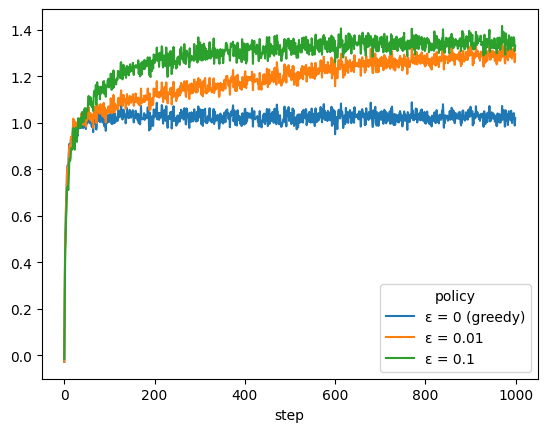

In [4]:
policy_names = {
    0: 'ε = 0.1',
    1: 'ε = 0.01',
    2: 'ε = 0 (greedy)'
}

(
    trace_df
    .assign(policy=trace_df.policy_idx.map(policy_names))
    .groupby(['step', 'policy'])
    ['reward'].mean()
    .unstack()
    .plot()
)


## Controlling the evaluation loop

The `bandit.evaluate` function is useful for benchmarking. But in practice, you'll want to have control over your bandit policy. Indeed you'll want the freedom to pull arms (with the `pull` method) and update the policy (with the `update` method) at your discretion.

As an example, the following is a possible reimplementation of the `bandit.evaluate` function. Here we'll be measuring the rate at which each policy selects the optimal arm.

Note how the `pull` and `update` methods are used.

In [5]:
import copy

policies=[
    bandit.EpsilonGreedy(epsilon=0.1),
    bandit.EpsilonGreedy(epsilon=0.01),
    bandit.EpsilonGreedy(epsilon=0),
]

env = gym.make(
    'river_bandits/KArmedTestbed-v0',
    max_episode_steps=1000
)
n_episodes = 2000

trace = []

with tqdm(total=len(policies) * n_episodes * env._max_episode_steps, position=0) as progress:
    for policy in policies:
        for episode in range(n_episodes):
            episode_policy = policy.clone()
            episode_env = copy.deepcopy(env)
            episode_env.reset()
            step = 0
            while True:
                action = episode_policy.pull(range(episode_env.action_space.n))
                observation, reward, terminated, truncated, info = episode_env.step(action)
                best_action = observation
                episode_policy.update(action, reward)

                trace.append({
                    "episode": episode,
                    "step": step,
                    "policy": f"ε = {policy.epsilon}",
                    "is_action_optimal": action == best_action
                })
                step += 1
                progress.update()

                if terminated or truncated:
                    break

trace_df = pd.DataFrame(trace)


  0%|          | 0/6000000 [00:00<?, ?it/s]

  0%|          | 8518/6000000 [00:00<01:10, 85176.63it/s]

  0%|          | 18195/6000000 [00:00<01:05, 91995.81it/s]

  0%|          | 27993/6000000 [00:00<01:03, 94725.34it/s]

  1%|          | 38027/6000000 [00:00<01:01, 96938.73it/s]

  1%|          | 48143/6000000 [00:00<01:00, 98458.14it/s]

  1%|          | 58280/6000000 [00:00<00:59, 99445.82it/s]

  1%|          | 68348/6000000 [00:00<00:59, 99846.44it/s]

  1%|▏         | 78333/6000000 [00:00<01:00, 98475.45it/s]

  1%|▏         | 88185/6000000 [00:00<01:00, 97353.51it/s]

  2%|▏         | 97925/6000000 [00:01<01:04, 91894.90it/s]

  2%|▏         | 107995/6000000 [00:01<01:02, 94454.09it/s]

  2%|▏         | 118001/6000000 [00:01<01:01, 96009.46it/s]

  2%|▏         | 128048/6000000 [00:01<01:00, 97324.50it/s]

  2%|▏         | 138168/6000000 [00:01<00:59, 98471.45it/s]

  2%|▏         | 148301/6000000 [00:01<00:58, 99321.47it/s]

  3%|▎         | 158413/6000000 [00:01<00:58, 99857.52it/s]

  3%|▎         | 168525/6000000 [00:01<00:58, 100234.19it/s]

  3%|▎         | 178599/6000000 [00:01<00:57, 100385.05it/s]

  3%|▎         | 188762/6000000 [00:01<00:57, 100756.05it/s]

  3%|▎         | 198843/6000000 [00:02<00:57, 100599.07it/s]

  3%|▎         | 209001/6000000 [00:02<00:57, 100753.67it/s]

  4%|▎         | 219140/6000000 [00:02<00:57, 100941.97it/s]

  4%|▍         | 229236/6000000 [00:02<00:57, 100838.17it/s]

  4%|▍         | 239322/6000000 [00:02<00:57, 100393.75it/s]

  4%|▍         | 249466/6000000 [00:02<00:57, 100704.15it/s]

  4%|▍         | 259644/6000000 [00:02<00:56, 101025.84it/s]

  4%|▍         | 269748/6000000 [00:02<00:56, 100959.35it/s]

  5%|▍         | 279865/6000000 [00:02<00:56, 101020.28it/s]

  5%|▍         | 289968/6000000 [00:02<00:56, 101008.14it/s]

  5%|▌         | 300070/6000000 [00:03<00:56, 100514.14it/s]

  5%|▌         | 310214/6000000 [00:03<00:56, 100790.10it/s]

  5%|▌         | 320305/6000000 [00:03<00:56, 100823.91it/s]

  6%|▌         | 330388/6000000 [00:03<00:56, 100672.64it/s]

  6%|▌         | 340490/6000000 [00:03<00:56, 100774.17it/s]

  6%|▌         | 350568/6000000 [00:03<00:56, 100645.59it/s]

  6%|▌         | 360633/6000000 [00:03<00:56, 100595.25it/s]

  6%|▌         | 370693/6000000 [00:03<00:55, 100537.99it/s]

  6%|▋         | 380747/6000000 [00:03<00:55, 100486.67it/s]

  7%|▋         | 390796/6000000 [00:03<00:55, 100390.48it/s]

  7%|▋         | 400836/6000000 [00:04<00:55, 100222.27it/s]

  7%|▋         | 410979/6000000 [00:04<00:55, 100583.30it/s]

  7%|▋         | 421038/6000000 [00:04<00:55, 100301.30it/s]

  7%|▋         | 431224/6000000 [00:04<00:55, 100765.01it/s]

  7%|▋         | 441338/6000000 [00:04<00:55, 100875.41it/s]

  8%|▊         | 451427/6000000 [00:04<00:55, 100877.72it/s]

  8%|▊         | 461515/6000000 [00:04<00:54, 100785.04it/s]

  8%|▊         | 471621/6000000 [00:04<00:54, 100866.65it/s]

  8%|▊         | 481708/6000000 [00:04<00:54, 100830.50it/s]

  8%|▊         | 491845/6000000 [00:04<00:54, 100991.43it/s]

  8%|▊         | 501945/6000000 [00:05<00:54, 100626.78it/s]

  9%|▊         | 512030/6000000 [00:05<00:54, 100691.71it/s]

  9%|▊         | 522132/6000000 [00:05<00:54, 100789.58it/s]

  9%|▉         | 532212/6000000 [00:05<00:54, 100754.31it/s]

  9%|▉         | 542288/6000000 [00:05<00:54, 100689.37it/s]

  9%|▉         | 552401/6000000 [00:05<00:54, 100819.46it/s]

  9%|▉         | 562484/6000000 [00:05<00:54, 100619.61it/s]

 10%|▉         | 572547/6000000 [00:05<00:54, 99994.89it/s] 

 10%|▉         | 582552/6000000 [00:05<00:54, 100009.50it/s]

 10%|▉         | 592660/6000000 [00:05<00:53, 100327.72it/s]

 10%|█         | 602732/6000000 [00:06<00:53, 100444.02it/s]

 10%|█         | 612815/6000000 [00:06<00:53, 100557.02it/s]

 10%|█         | 622875/6000000 [00:06<00:53, 100569.57it/s]

 11%|█         | 632964/6000000 [00:06<00:53, 100665.56it/s]

 11%|█         | 643031/6000000 [00:06<00:53, 99991.25it/s] 

 11%|█         | 653032/6000000 [00:06<00:53, 99983.50it/s]

 11%|█         | 663139/6000000 [00:06<00:53, 100306.12it/s]

 11%|█         | 673171/6000000 [00:06<00:53, 100255.59it/s]

 11%|█▏        | 683245/6000000 [00:06<00:52, 100399.61it/s]

 12%|█▏        | 693348/6000000 [00:06<00:52, 100586.81it/s]

 12%|█▏        | 703438/6000000 [00:07<00:52, 100680.33it/s]

 12%|█▏        | 713507/6000000 [00:07<00:52, 100606.82it/s]

 12%|█▏        | 723568/6000000 [00:07<00:52, 100478.44it/s]

 12%|█▏        | 733652/6000000 [00:07<00:52, 100583.88it/s]

 12%|█▏        | 743711/6000000 [00:07<00:52, 100547.96it/s]

 13%|█▎        | 753821/6000000 [00:07<00:52, 100711.48it/s]

 13%|█▎        | 763893/6000000 [00:07<00:52, 100676.79it/s]

 13%|█▎        | 773961/6000000 [00:07<00:51, 100580.67it/s]

 13%|█▎        | 784020/6000000 [00:07<00:52, 100232.06it/s]

 13%|█▎        | 794044/6000000 [00:07<00:51, 100193.32it/s]

 13%|█▎        | 804128/6000000 [00:08<00:51, 100386.42it/s]

 14%|█▎        | 814199/6000000 [00:08<00:51, 100482.20it/s]

 14%|█▎        | 824248/6000000 [00:08<00:51, 100318.38it/s]

 14%|█▍        | 834282/6000000 [00:08<00:51, 100322.09it/s]

 14%|█▍        | 844388/6000000 [00:08<00:51, 100542.67it/s]

 14%|█▍        | 854535/6000000 [00:08<00:51, 100818.16it/s]

 14%|█▍        | 864639/6000000 [00:08<00:50, 100883.83it/s]

 15%|█▍        | 874728/6000000 [00:08<00:50, 100811.84it/s]

 15%|█▍        | 884815/6000000 [00:08<00:50, 100828.15it/s]

 15%|█▍        | 894898/6000000 [00:08<00:50, 100719.30it/s]

 15%|█▌        | 904986/6000000 [00:09<00:50, 100765.18it/s]

 15%|█▌        | 915063/6000000 [00:09<00:50, 100484.08it/s]

 15%|█▌        | 925112/6000000 [00:09<00:50, 100451.19it/s]

 16%|█▌        | 935158/6000000 [00:09<00:50, 100415.94it/s]

 16%|█▌        | 945202/6000000 [00:09<00:50, 100422.46it/s]

 16%|█▌        | 955299/6000000 [00:09<00:50, 100583.75it/s]

 16%|█▌        | 965390/6000000 [00:09<00:50, 100681.14it/s]

 16%|█▋        | 975459/6000000 [00:09<00:49, 100622.11it/s]

 16%|█▋        | 985534/6000000 [00:09<00:49, 100658.17it/s]

 17%|█▋        | 995600/6000000 [00:09<00:49, 100425.44it/s]

 17%|█▋        | 1005690/6000000 [00:10<00:49, 100564.89it/s]

 17%|█▋        | 1015747/6000000 [00:10<00:49, 100517.42it/s]

 17%|█▋        | 1025799/6000000 [00:10<00:49, 100479.10it/s]

 17%|█▋        | 1035847/6000000 [00:10<00:49, 100455.86it/s]

 17%|█▋        | 1045928/6000000 [00:10<00:49, 100559.22it/s]

 18%|█▊        | 1055984/6000000 [00:10<00:49, 100463.34it/s]

 18%|█▊        | 1066031/6000000 [00:10<00:49, 100056.85it/s]

 18%|█▊        | 1076068/6000000 [00:10<00:49, 100146.69it/s]

 18%|█▊        | 1086107/6000000 [00:10<00:49, 100216.74it/s]

 18%|█▊        | 1096161/6000000 [00:10<00:48, 100311.70it/s]

 18%|█▊        | 1106213/6000000 [00:11<00:48, 100371.99it/s]

 19%|█▊        | 1116251/6000000 [00:11<00:48, 100354.63it/s]

 19%|█▉        | 1126324/6000000 [00:11<00:48, 100466.03it/s]

 19%|█▉        | 1136381/6000000 [00:11<00:48, 100495.87it/s]

 19%|█▉        | 1146445/6000000 [00:11<00:48, 100538.33it/s]

 19%|█▉        | 1156554/6000000 [00:11<00:48, 100703.52it/s]

 19%|█▉        | 1166625/6000000 [00:11<00:48, 100506.76it/s]

 20%|█▉        | 1176693/6000000 [00:11<00:47, 100556.10it/s]

 20%|█▉        | 1186749/6000000 [00:11<00:47, 100534.96it/s]

 20%|█▉        | 1196803/6000000 [00:11<00:47, 100458.75it/s]

 20%|██        | 1206849/6000000 [00:12<00:47, 100348.25it/s]

 20%|██        | 1216884/6000000 [00:12<00:47, 100184.75it/s]

 20%|██        | 1226903/6000000 [00:12<00:47, 100059.75it/s]

 21%|██        | 1236918/6000000 [00:12<00:47, 100086.43it/s]

 21%|██        | 1246927/6000000 [00:12<00:48, 97754.11it/s] 

 21%|██        | 1256860/6000000 [00:12<00:48, 98214.84it/s]

 21%|██        | 1266691/6000000 [00:12<00:48, 98144.48it/s]

 21%|██▏       | 1276512/6000000 [00:12<00:48, 97919.77it/s]

 21%|██▏       | 1286330/6000000 [00:12<00:48, 97994.99it/s]

 22%|██▏       | 1296230/6000000 [00:12<00:47, 98293.14it/s]

 22%|██▏       | 1306129/6000000 [00:13<00:47, 98498.84it/s]

 22%|██▏       | 1316001/6000000 [00:13<00:47, 98475.48it/s]

 22%|██▏       | 1325876/6000000 [00:13<00:47, 98555.74it/s]

 22%|██▏       | 1335733/6000000 [00:13<00:47, 98270.86it/s]

 22%|██▏       | 1345561/6000000 [00:13<00:47, 98241.54it/s]

 23%|██▎       | 1355422/6000000 [00:13<00:47, 98350.14it/s]

 23%|██▎       | 1365258/6000000 [00:13<00:47, 98264.09it/s]

 23%|██▎       | 1375088/6000000 [00:13<00:47, 98274.80it/s]

 23%|██▎       | 1385001/6000000 [00:13<00:46, 98470.20it/s]

 23%|██▎       | 1394877/6000000 [00:13<00:46, 98554.73it/s]

 23%|██▎       | 1404733/6000000 [00:14<00:46, 98485.89it/s]

 24%|██▎       | 1414582/6000000 [00:14<00:46, 98451.56it/s]

 24%|██▎       | 1424446/6000000 [00:14<00:46, 98507.85it/s]

 24%|██▍       | 1434331/6000000 [00:14<00:46, 98610.37it/s]

 24%|██▍       | 1444193/6000000 [00:14<00:46, 98518.21it/s]

 24%|██▍       | 1454045/6000000 [00:14<00:46, 98466.22it/s]

 24%|██▍       | 1463924/6000000 [00:14<00:46, 98562.64it/s]

 25%|██▍       | 1473781/6000000 [00:14<00:45, 98416.39it/s]

 25%|██▍       | 1483695/6000000 [00:14<00:45, 98631.46it/s]

 25%|██▍       | 1493619/6000000 [00:14<00:45, 98812.86it/s]

 25%|██▌       | 1503501/6000000 [00:15<00:45, 98720.49it/s]

 25%|██▌       | 1513374/6000000 [00:15<00:46, 96731.68it/s]

 25%|██▌       | 1523239/6000000 [00:15<00:46, 97296.07it/s]

 26%|██▌       | 1533133/6000000 [00:15<00:45, 97781.48it/s]

 26%|██▌       | 1543061/6000000 [00:15<00:45, 98227.22it/s]

 26%|██▌       | 1552966/6000000 [00:15<00:45, 98472.23it/s]

 26%|██▌       | 1562846/6000000 [00:15<00:45, 98568.47it/s]

 26%|██▌       | 1572751/6000000 [00:15<00:44, 98712.16it/s]

 26%|██▋       | 1582626/6000000 [00:15<00:44, 98721.05it/s]

 27%|██▋       | 1592541/6000000 [00:15<00:44, 98847.13it/s]

 27%|██▋       | 1602427/6000000 [00:16<00:44, 98720.36it/s]

 27%|██▋       | 1612300/6000000 [00:16<00:44, 98565.89it/s]

 27%|██▋       | 1622232/6000000 [00:16<00:44, 98789.67it/s]

 27%|██▋       | 1632112/6000000 [00:16<00:44, 98711.94it/s]

 27%|██▋       | 1642006/6000000 [00:16<00:44, 98777.38it/s]

 28%|██▊       | 1652001/6000000 [00:16<00:43, 99039.48it/s]

 28%|██▊       | 1661906/6000000 [00:16<00:44, 98356.70it/s]

 28%|██▊       | 1671743/6000000 [00:16<00:44, 98328.11it/s]

 28%|██▊       | 1681592/6000000 [00:16<00:43, 98376.35it/s]

 28%|██▊       | 1691431/6000000 [00:16<00:43, 98205.26it/s]

 28%|██▊       | 1701252/6000000 [00:17<00:43, 98199.42it/s]

 29%|██▊       | 1711073/6000000 [00:17<00:44, 96354.58it/s]

 29%|██▊       | 1721008/6000000 [00:17<00:44, 97238.10it/s]

 29%|██▉       | 1730946/6000000 [00:17<00:43, 97871.94it/s]

 29%|██▉       | 1740777/6000000 [00:17<00:43, 98001.30it/s]

 29%|██▉       | 1750611/6000000 [00:17<00:43, 98101.92it/s]

 29%|██▉       | 1760424/6000000 [00:17<00:43, 98006.13it/s]

 30%|██▉       | 1770240/6000000 [00:17<00:43, 98050.28it/s]

 30%|██▉       | 1780047/6000000 [00:17<00:43, 97951.37it/s]

 30%|██▉       | 1789876/6000000 [00:17<00:42, 98052.04it/s]

 30%|██▉       | 1799682/6000000 [00:18<00:42, 98054.10it/s]

 30%|███       | 1809488/6000000 [00:18<00:42, 97732.97it/s]

 30%|███       | 1819330/6000000 [00:18<00:42, 97935.25it/s]

 30%|███       | 1829157/6000000 [00:18<00:42, 98033.45it/s]

 31%|███       | 1839001/6000000 [00:18<00:42, 98111.81it/s]

 31%|███       | 1848908/6000000 [00:18<00:42, 98397.84it/s]

 31%|███       | 1858792/6000000 [00:18<00:42, 98529.61it/s]

 31%|███       | 1868654/6000000 [00:18<00:41, 98553.99it/s]

 31%|███▏      | 1878516/6000000 [00:18<00:41, 98570.99it/s]

 31%|███▏      | 1888374/6000000 [00:18<00:41, 98551.95it/s]

 32%|███▏      | 1898230/6000000 [00:19<00:41, 98445.01it/s]

 32%|███▏      | 1908101/6000000 [00:19<00:41, 98522.97it/s]

 32%|███▏      | 1917954/6000000 [00:19<00:42, 96955.43it/s]

 32%|███▏      | 1927878/6000000 [00:19<00:41, 97631.13it/s]

 32%|███▏      | 1937793/6000000 [00:19<00:41, 98082.22it/s]

 32%|███▏      | 1947680/6000000 [00:19<00:41, 98315.26it/s]

 33%|███▎      | 1957569/6000000 [00:19<00:41, 98484.76it/s]

 33%|███▎      | 1967448/6000000 [00:19<00:40, 98575.32it/s]

 33%|███▎      | 1977348/6000000 [00:19<00:40, 98702.00it/s]

 33%|███▎      | 1987246/6000000 [00:19<00:40, 98785.17it/s]

 33%|███▎      | 1997197/6000000 [00:20<00:40, 99001.23it/s]

 33%|███▎      | 2007098/6000000 [00:20<00:40, 97520.74it/s]

 34%|███▎      | 2016856/6000000 [00:20<00:41, 96315.81it/s]

 34%|███▍      | 2026494/6000000 [00:20<00:41, 95305.74it/s]

 34%|███▍      | 2036030/6000000 [00:20<00:41, 95062.48it/s]

 34%|███▍      | 2045540/6000000 [00:20<00:42, 93755.39it/s]

 34%|███▍      | 2054920/6000000 [00:20<00:42, 93009.42it/s]

 34%|███▍      | 2064224/6000000 [00:20<00:43, 91413.39it/s]

 35%|███▍      | 2073540/6000000 [00:20<00:42, 91922.03it/s]

 35%|███▍      | 2082919/6000000 [00:21<00:42, 92471.77it/s]

 35%|███▍      | 2092199/6000000 [00:21<00:42, 92568.14it/s]

 35%|███▌      | 2101718/6000000 [00:21<00:41, 93345.55it/s]

 35%|███▌      | 2111056/6000000 [00:21<00:41, 93201.12it/s]

 35%|███▌      | 2120415/6000000 [00:21<00:41, 93316.62it/s]

 35%|███▌      | 2129793/6000000 [00:21<00:41, 93454.11it/s]

 36%|███▌      | 2139140/6000000 [00:21<00:41, 92894.97it/s]

 36%|███▌      | 2148431/6000000 [00:21<00:41, 92612.38it/s]

 36%|███▌      | 2157813/6000000 [00:21<00:41, 92969.83it/s]

 36%|███▌      | 2167111/6000000 [00:21<00:41, 92556.81it/s]

 36%|███▋      | 2176368/6000000 [00:22<00:41, 92456.48it/s]

 36%|███▋      | 2185636/6000000 [00:22<00:41, 92520.84it/s]

 37%|███▋      | 2194889/6000000 [00:22<00:41, 92429.42it/s]

 37%|███▋      | 2204133/6000000 [00:22<00:41, 92118.37it/s]

 37%|███▋      | 2213346/6000000 [00:22<00:41, 91655.53it/s]

 37%|███▋      | 2222587/6000000 [00:22<00:41, 91878.92it/s]

 37%|███▋      | 2231986/6000000 [00:22<00:40, 92508.50it/s]

 37%|███▋      | 2241238/6000000 [00:22<00:40, 92362.25it/s]

 38%|███▊      | 2250511/6000000 [00:22<00:40, 92469.84it/s]

 38%|███▊      | 2259759/6000000 [00:22<00:40, 92462.48it/s]

 38%|███▊      | 2269006/6000000 [00:23<00:40, 92332.52it/s]

 38%|███▊      | 2278279/6000000 [00:23<00:40, 92450.80it/s]

 38%|███▊      | 2287525/6000000 [00:23<00:40, 92370.99it/s]

 38%|███▊      | 2296763/6000000 [00:23<00:40, 91747.65it/s]

 38%|███▊      | 2306076/6000000 [00:23<00:40, 92157.09it/s]

 39%|███▊      | 2315401/6000000 [00:23<00:39, 92481.96it/s]

 39%|███▊      | 2324650/6000000 [00:23<00:39, 92339.32it/s]

 39%|███▉      | 2333983/6000000 [00:23<00:39, 92632.51it/s]

 39%|███▉      | 2343247/6000000 [00:23<00:39, 92441.94it/s]

 39%|███▉      | 2352492/6000000 [00:23<00:39, 92321.01it/s]

 39%|███▉      | 2361888/6000000 [00:24<00:39, 92809.77it/s]

 40%|███▉      | 2371170/6000000 [00:24<00:39, 92298.77it/s]

 40%|███▉      | 2380458/6000000 [00:24<00:39, 92470.19it/s]

 40%|███▉      | 2389706/6000000 [00:24<00:39, 90473.72it/s]

 40%|███▉      | 2399068/6000000 [00:24<00:39, 91400.25it/s]

 40%|████      | 2408505/6000000 [00:24<00:38, 92277.97it/s]

 40%|████      | 2417968/6000000 [00:24<00:38, 92976.83it/s]

 40%|████      | 2427272/6000000 [00:24<00:38, 92835.34it/s]

 41%|████      | 2436594/6000000 [00:24<00:38, 92949.99it/s]

 41%|████      | 2446001/6000000 [00:24<00:38, 93269.62it/s]

 41%|████      | 2455330/6000000 [00:25<00:38, 93256.19it/s]

 41%|████      | 2464664/6000000 [00:25<00:37, 93280.24it/s]

 41%|████      | 2473994/6000000 [00:25<00:37, 93220.74it/s]

 41%|████▏     | 2483317/6000000 [00:25<00:37, 92885.97it/s]

 42%|████▏     | 2492844/6000000 [00:25<00:37, 93597.68it/s]

 42%|████▏     | 2502205/6000000 [00:25<00:37, 93574.56it/s]

 42%|████▏     | 2511608/6000000 [00:25<00:37, 93709.94it/s]

 42%|████▏     | 2520980/6000000 [00:25<00:37, 93588.25it/s]

 42%|████▏     | 2530340/6000000 [00:25<00:37, 93214.28it/s]

 42%|████▏     | 2539662/6000000 [00:25<00:37, 92853.58it/s]

 42%|████▏     | 2548988/6000000 [00:26<00:37, 92973.13it/s]

 43%|████▎     | 2558286/6000000 [00:26<00:37, 92814.00it/s]

 43%|████▎     | 2567568/6000000 [00:26<00:37, 92622.29it/s]

 43%|████▎     | 2576831/6000000 [00:26<00:37, 90924.16it/s]

 43%|████▎     | 2585995/6000000 [00:26<00:37, 91134.31it/s]

 43%|████▎     | 2595143/6000000 [00:26<00:37, 91236.17it/s]

 43%|████▎     | 2604431/6000000 [00:26<00:37, 91724.04it/s]

 44%|████▎     | 2613713/6000000 [00:26<00:36, 92049.14it/s]

 44%|████▎     | 2623080/6000000 [00:26<00:36, 92532.61it/s]

 44%|████▍     | 2632363/6000000 [00:26<00:36, 92621.28it/s]

 44%|████▍     | 2641640/6000000 [00:27<00:36, 92663.79it/s]

 44%|████▍     | 2650966/6000000 [00:27<00:36, 92842.17it/s]

 44%|████▍     | 2660251/6000000 [00:27<00:35, 92772.08it/s]

 44%|████▍     | 2669529/6000000 [00:27<00:35, 92693.10it/s]

 45%|████▍     | 2678799/6000000 [00:27<00:35, 92351.16it/s]

 45%|████▍     | 2688113/6000000 [00:27<00:35, 92586.78it/s]

 45%|████▍     | 2697530/6000000 [00:27<00:35, 93058.71it/s]

 45%|████▌     | 2706979/6000000 [00:27<00:35, 93487.15it/s]

 45%|████▌     | 2716329/6000000 [00:27<00:35, 93327.75it/s]

 45%|████▌     | 2725663/6000000 [00:27<00:35, 93119.56it/s]

 46%|████▌     | 2734976/6000000 [00:28<00:35, 93021.49it/s]

 46%|████▌     | 2744279/6000000 [00:28<00:35, 92666.07it/s]

 46%|████▌     | 2753554/6000000 [00:28<00:35, 92689.17it/s]

 46%|████▌     | 2762824/6000000 [00:28<00:35, 92441.56it/s]

 46%|████▌     | 2772144/6000000 [00:28<00:34, 92667.96it/s]

 46%|████▋     | 2781510/6000000 [00:28<00:34, 92964.45it/s]

 47%|████▋     | 2790821/6000000 [00:28<00:34, 93006.06it/s]

 47%|████▋     | 2800122/6000000 [00:28<00:34, 92969.22it/s]

 47%|████▋     | 2809420/6000000 [00:28<00:34, 92785.04it/s]

 47%|████▋     | 2818699/6000000 [00:28<00:34, 92589.00it/s]

 47%|████▋     | 2828001/6000000 [00:29<00:34, 92707.02it/s]

 47%|████▋     | 2837374/6000000 [00:29<00:34, 93011.38it/s]

 47%|████▋     | 2846705/6000000 [00:29<00:33, 93099.92it/s]

 48%|████▊     | 2856016/6000000 [00:29<00:34, 90482.14it/s]

 48%|████▊     | 2865353/6000000 [00:29<00:34, 91330.25it/s]

 48%|████▊     | 2874612/6000000 [00:29<00:34, 91700.63it/s]

 48%|████▊     | 2884001/6000000 [00:29<00:33, 92279.07it/s]

 48%|████▊     | 2893237/6000000 [00:29<00:33, 92063.26it/s]

 48%|████▊     | 2902549/6000000 [00:29<00:33, 92376.83it/s]

 49%|████▊     | 2911935/6000000 [00:29<00:33, 92817.43it/s]

 49%|████▊     | 2921220/6000000 [00:30<00:33, 92627.24it/s]

 49%|████▉     | 2930538/6000000 [00:30<00:33, 92792.03it/s]

 49%|████▉     | 2939893/6000000 [00:30<00:32, 93018.34it/s]

 49%|████▉     | 2949196/6000000 [00:30<00:33, 91983.88it/s]

 49%|████▉     | 2958488/6000000 [00:30<00:32, 92259.86it/s]

 49%|████▉     | 2967940/6000000 [00:30<00:32, 92932.94it/s]

 50%|████▉     | 2977267/6000000 [00:30<00:32, 93033.16it/s]

 50%|████▉     | 2986572/6000000 [00:30<00:32, 92970.81it/s]

 50%|████▉     | 2996001/6000000 [00:30<00:32, 93262.00it/s]

 50%|█████     | 3005364/6000000 [00:30<00:32, 93369.66it/s]

 50%|█████     | 3014723/6000000 [00:31<00:31, 93434.53it/s]

 50%|█████     | 3024067/6000000 [00:31<00:31, 93329.93it/s]

 51%|█████     | 3033411/6000000 [00:31<00:31, 93361.85it/s]

 51%|█████     | 3042782/6000000 [00:31<00:31, 93463.46it/s]

 51%|█████     | 3052129/6000000 [00:31<00:32, 90077.68it/s]

 51%|█████     | 3061301/6000000 [00:31<00:32, 90556.58it/s]

 51%|█████     | 3070730/6000000 [00:31<00:31, 91655.81it/s]

 51%|█████▏    | 3080017/6000000 [00:31<00:31, 92014.17it/s]

 51%|█████▏    | 3089304/6000000 [00:31<00:31, 92267.61it/s]

 52%|█████▏    | 3098540/6000000 [00:31<00:31, 91026.84it/s]

 52%|█████▏    | 3107652/6000000 [00:32<00:33, 87592.24it/s]

 52%|█████▏    | 3117001/6000000 [00:32<00:32, 89243.93it/s]

 52%|█████▏    | 3126285/6000000 [00:32<00:31, 90292.42it/s]

 52%|█████▏    | 3135578/6000000 [00:32<00:31, 91066.73it/s]

 52%|█████▏    | 3144733/6000000 [00:32<00:31, 91209.70it/s]

 53%|█████▎    | 3154001/6000000 [00:32<00:31, 91631.23it/s]

 53%|█████▎    | 3163371/6000000 [00:32<00:30, 92246.22it/s]

 53%|█████▎    | 3172727/6000000 [00:32<00:30, 92636.97it/s]

 53%|█████▎    | 3182051/6000000 [00:32<00:30, 92814.93it/s]

 53%|█████▎    | 3191379/6000000 [00:33<00:30, 92953.69it/s]

 53%|█████▎    | 3200677/6000000 [00:33<00:30, 92460.33it/s]

 53%|█████▎    | 3209961/6000000 [00:33<00:30, 92572.91it/s]

 54%|█████▎    | 3219220/6000000 [00:33<00:30, 92466.20it/s]

 54%|█████▍    | 3228542/6000000 [00:33<00:29, 92689.05it/s]

 54%|█████▍    | 3237812/6000000 [00:33<00:29, 92515.75it/s]

 54%|█████▍    | 3247065/6000000 [00:33<00:29, 92309.32it/s]

 54%|█████▍    | 3256297/6000000 [00:33<00:29, 92288.07it/s]

 54%|█████▍    | 3265801/6000000 [00:33<00:29, 93109.08it/s]

 55%|█████▍    | 3275113/6000000 [00:33<00:29, 92590.80it/s]

 55%|█████▍    | 3284541/6000000 [00:34<00:29, 93092.99it/s]

 55%|█████▍    | 3293882/6000000 [00:34<00:29, 93185.64it/s]

 55%|█████▌    | 3303202/6000000 [00:34<00:29, 92843.17it/s]

 55%|█████▌    | 3312550/6000000 [00:34<00:28, 93032.27it/s]

 55%|█████▌    | 3322001/6000000 [00:34<00:28, 93324.11it/s]

 56%|█████▌    | 3331334/6000000 [00:34<00:28, 92933.16it/s]

 56%|█████▌    | 3340821/6000000 [00:34<00:28, 93510.05it/s]

 56%|█████▌    | 3350173/6000000 [00:34<00:28, 93325.64it/s]

 56%|█████▌    | 3359568/6000000 [00:34<00:28, 93509.43it/s]

 56%|█████▌    | 3368920/6000000 [00:34<00:28, 93312.89it/s]

 56%|█████▋    | 3378252/6000000 [00:35<00:28, 92846.37it/s]

 56%|█████▋    | 3387570/6000000 [00:35<00:28, 92945.62it/s]

 57%|█████▋    | 3396866/6000000 [00:35<00:28, 92860.85it/s]

 57%|█████▋    | 3406249/6000000 [00:35<00:27, 93149.85it/s]

 57%|█████▋    | 3415565/6000000 [00:35<00:27, 92657.57it/s]

 57%|█████▋    | 3424856/6000000 [00:35<00:27, 92731.66it/s]

 57%|█████▋    | 3434130/6000000 [00:35<00:27, 91915.43it/s]

 57%|█████▋    | 3443372/6000000 [00:35<00:27, 92064.18it/s]

 58%|█████▊    | 3452650/6000000 [00:35<00:27, 92275.51it/s]

 58%|█████▊    | 3461960/6000000 [00:35<00:27, 92518.83it/s]

 58%|█████▊    | 3471213/6000000 [00:36<00:27, 92434.74it/s]

 58%|█████▊    | 3480462/6000000 [00:36<00:27, 92449.58it/s]

 58%|█████▊    | 3489721/6000000 [00:36<00:27, 92490.06it/s]

 58%|█████▊    | 3498971/6000000 [00:36<00:27, 92230.82it/s]

 58%|█████▊    | 3508256/6000000 [00:36<00:26, 92414.00it/s]

 59%|█████▊    | 3517498/6000000 [00:36<00:27, 91151.26it/s]

 59%|█████▉    | 3526767/6000000 [00:36<00:26, 91607.08it/s]

 59%|█████▉    | 3536033/6000000 [00:36<00:26, 91917.85it/s]

 59%|█████▉    | 3545251/6000000 [00:36<00:26, 91994.45it/s]

 59%|█████▉    | 3554454/6000000 [00:36<00:26, 92002.61it/s]

 59%|█████▉    | 3563732/6000000 [00:37<00:26, 92233.05it/s]

 60%|█████▉    | 3573001/6000000 [00:37<00:26, 92192.00it/s]

 60%|█████▉    | 3582221/6000000 [00:37<00:26, 91956.70it/s]

 60%|█████▉    | 3591647/6000000 [00:37<00:25, 92642.72it/s]

 60%|██████    | 3601001/6000000 [00:37<00:25, 92874.66it/s]

 60%|██████    | 3610289/6000000 [00:37<00:25, 92762.27it/s]

 60%|██████    | 3619566/6000000 [00:37<00:25, 92750.05it/s]

 60%|██████    | 3628857/6000000 [00:37<00:25, 92797.25it/s]

 61%|██████    | 3638137/6000000 [00:37<00:25, 92785.44it/s]

 61%|██████    | 3647491/6000000 [00:37<00:25, 93009.03it/s]

 61%|██████    | 3656793/6000000 [00:38<00:25, 92954.81it/s]

 61%|██████    | 3666089/6000000 [00:38<00:25, 92520.56it/s]

 61%|██████▏   | 3675342/6000000 [00:38<00:25, 92227.33it/s]

 61%|██████▏   | 3684708/6000000 [00:38<00:24, 92653.49it/s]

 62%|██████▏   | 3693974/6000000 [00:38<00:24, 92489.61it/s]

 62%|██████▏   | 3703283/6000000 [00:38<00:24, 92666.31it/s]

 62%|██████▏   | 3712711/6000000 [00:38<00:24, 93146.32it/s]

 62%|██████▏   | 3722026/6000000 [00:38<00:24, 92760.10it/s]

 62%|██████▏   | 3731528/6000000 [00:38<00:24, 93433.98it/s]

 62%|██████▏   | 3740898/6000000 [00:38<00:24, 93512.44it/s]

 63%|██████▎   | 3750250/6000000 [00:39<00:24, 93493.04it/s]

 63%|██████▎   | 3759600/6000000 [00:39<00:24, 93011.89it/s]

 63%|██████▎   | 3768910/6000000 [00:39<00:23, 93037.82it/s]

 63%|██████▎   | 3778215/6000000 [00:39<00:23, 92966.20it/s]

 63%|██████▎   | 3787592/6000000 [00:39<00:23, 93204.41it/s]

 63%|██████▎   | 3796913/6000000 [00:39<00:23, 92998.67it/s]

 63%|██████▎   | 3806214/6000000 [00:39<00:23, 92593.36it/s]

 64%|██████▎   | 3815563/6000000 [00:39<00:23, 92860.59it/s]

 64%|██████▎   | 3824970/6000000 [00:39<00:23, 93219.66it/s]

 64%|██████▍   | 3834293/6000000 [00:39<00:23, 92807.24it/s]

 64%|██████▍   | 3843638/6000000 [00:40<00:23, 92997.16it/s]

 64%|██████▍   | 3852939/6000000 [00:40<00:23, 92982.87it/s]

 64%|██████▍   | 3862312/6000000 [00:40<00:22, 93204.40it/s]

 65%|██████▍   | 3871721/6000000 [00:40<00:22, 93467.89it/s]

 65%|██████▍   | 3881069/6000000 [00:40<00:22, 93260.56it/s]

 65%|██████▍   | 3890396/6000000 [00:40<00:22, 92755.42it/s]

 65%|██████▍   | 3899673/6000000 [00:40<00:22, 92741.06it/s]

 65%|██████▌   | 3909001/6000000 [00:40<00:22, 92901.19it/s]

 65%|██████▌   | 3918361/6000000 [00:40<00:22, 93108.27it/s]

 65%|██████▌   | 3927673/6000000 [00:40<00:22, 93104.30it/s]

 66%|██████▌   | 3936984/6000000 [00:41<00:22, 93021.39it/s]

 66%|██████▌   | 3946287/6000000 [00:41<00:22, 92975.47it/s]

 66%|██████▌   | 3955585/6000000 [00:41<00:22, 92807.51it/s]

 66%|██████▌   | 3964866/6000000 [00:41<00:22, 92248.88it/s]

 66%|██████▌   | 3974092/6000000 [00:41<00:21, 92094.67it/s]

 66%|██████▋   | 3983463/6000000 [00:41<00:21, 92576.20it/s]

 67%|██████▋   | 3992722/6000000 [00:41<00:22, 89958.94it/s]

 67%|██████▋   | 4002001/6000000 [00:41<00:22, 90661.71it/s]

 67%|██████▋   | 4011542/6000000 [00:41<00:21, 92061.53it/s]

 67%|██████▋   | 4021054/6000000 [00:41<00:21, 92967.28it/s]

 67%|██████▋   | 4030670/6000000 [00:42<00:20, 93915.92it/s]

 67%|██████▋   | 4040186/6000000 [00:42<00:20, 94286.92it/s]

 67%|██████▋   | 4049620/6000000 [00:42<00:20, 94191.63it/s]

 68%|██████▊   | 4059181/6000000 [00:42<00:20, 94615.45it/s]

 68%|██████▊   | 4068799/6000000 [00:42<00:20, 95082.40it/s]

 68%|██████▊   | 4078394/6000000 [00:42<00:20, 95341.89it/s]

 68%|██████▊   | 4087930/6000000 [00:42<00:20, 95122.16it/s]

 68%|██████▊   | 4097491/6000000 [00:42<00:19, 95265.52it/s]

 68%|██████▊   | 4107019/6000000 [00:42<00:19, 94735.61it/s]

 69%|██████▊   | 4116716/6000000 [00:42<00:19, 95400.98it/s]

 69%|██████▉   | 4126297/6000000 [00:43<00:19, 95521.43it/s]

 69%|██████▉   | 4135869/6000000 [00:43<00:19, 95580.05it/s]

 69%|██████▉   | 4145428/6000000 [00:43<00:19, 95536.88it/s]

 69%|██████▉   | 4154983/6000000 [00:43<00:20, 91583.14it/s]

 69%|██████▉   | 4164204/6000000 [00:43<00:20, 91764.09it/s]

 70%|██████▉   | 4173598/6000000 [00:43<00:19, 92401.02it/s]

 70%|██████▉   | 4182991/6000000 [00:43<00:19, 92850.62it/s]

 70%|██████▉   | 4192587/6000000 [00:43<00:19, 93772.42it/s]

 70%|███████   | 4202167/6000000 [00:43<00:19, 94374.48it/s]

 70%|███████   | 4211613/6000000 [00:43<00:18, 94210.87it/s]

 70%|███████   | 4221040/6000000 [00:44<00:18, 94114.76it/s]

 71%|███████   | 4230549/6000000 [00:44<00:18, 94403.78it/s]

 71%|███████   | 4240004/6000000 [00:44<00:18, 94446.26it/s]

 71%|███████   | 4249671/6000000 [00:44<00:18, 95111.06it/s]

 71%|███████   | 4259301/6000000 [00:44<00:18, 95467.08it/s]

 71%|███████   | 4268849/6000000 [00:44<00:18, 95303.68it/s]

 71%|███████▏  | 4278381/6000000 [00:44<00:18, 95111.29it/s]

 71%|███████▏  | 4287999/6000000 [00:44<00:17, 95430.95it/s]

 72%|███████▏  | 4297543/6000000 [00:44<00:17, 94793.56it/s]

 72%|███████▏  | 4307024/6000000 [00:44<00:17, 94515.55it/s]

 72%|███████▏  | 4316477/6000000 [00:45<00:17, 94247.60it/s]

 72%|███████▏  | 4325967/6000000 [00:45<00:17, 94440.07it/s]

 72%|███████▏  | 4335636/6000000 [00:45<00:17, 95109.29it/s]

 72%|███████▏  | 4345148/6000000 [00:45<00:17, 95050.65it/s]

 73%|███████▎  | 4354680/6000000 [00:45<00:17, 95129.57it/s]

 73%|███████▎  | 4364372/6000000 [00:45<00:17, 95665.02it/s]

 73%|███████▎  | 4373939/6000000 [00:45<00:17, 95128.44it/s]

 73%|███████▎  | 4383453/6000000 [00:45<00:17, 94965.64it/s]

 73%|███████▎  | 4393001/6000000 [00:45<00:16, 94951.81it/s]

 73%|███████▎  | 4402635/6000000 [00:45<00:16, 95364.94it/s]

 74%|███████▎  | 4412172/6000000 [00:46<00:16, 95295.95it/s]

 74%|███████▎  | 4421702/6000000 [00:46<00:16, 95248.20it/s]

 74%|███████▍  | 4431228/6000000 [00:46<00:16, 94655.17it/s]

 74%|███████▍  | 4440826/6000000 [00:46<00:16, 95049.93it/s]

 74%|███████▍  | 4450332/6000000 [00:46<00:16, 94853.53it/s]

 74%|███████▍  | 4459943/6000000 [00:46<00:16, 95228.63it/s]

 74%|███████▍  | 4469467/6000000 [00:46<00:16, 94847.65it/s]

 75%|███████▍  | 4479049/6000000 [00:46<00:15, 95135.55it/s]

 75%|███████▍  | 4488799/6000000 [00:46<00:15, 95839.69it/s]

 75%|███████▍  | 4498384/6000000 [00:46<00:15, 95822.84it/s]

 75%|███████▌  | 4508001/6000000 [00:47<00:15, 95800.97it/s]

 75%|███████▌  | 4517806/6000000 [00:47<00:15, 96470.48it/s]

 75%|███████▌  | 4527715/6000000 [00:47<00:15, 97253.31it/s]

 76%|███████▌  | 4537441/6000000 [00:47<00:15, 95941.20it/s]

 76%|███████▌  | 4547040/6000000 [00:47<00:15, 95432.76it/s]

 76%|███████▌  | 4556690/6000000 [00:47<00:15, 95748.34it/s]

 76%|███████▌  | 4566268/6000000 [00:47<00:15, 94207.18it/s]

 76%|███████▋  | 4575945/6000000 [00:47<00:14, 94961.87it/s]

 76%|███████▋  | 4585447/6000000 [00:47<00:14, 94770.88it/s]

 77%|███████▋  | 4595001/6000000 [00:48<00:14, 94845.95it/s]

 77%|███████▋  | 4604543/6000000 [00:48<00:14, 95014.65it/s]

 77%|███████▋  | 4614262/6000000 [00:48<00:14, 95662.37it/s]

 77%|███████▋  | 4623847/6000000 [00:48<00:14, 95717.71it/s]

 77%|███████▋  | 4633421/6000000 [00:48<00:14, 95400.85it/s]

 77%|███████▋  | 4642963/6000000 [00:48<00:14, 95347.52it/s]

 78%|███████▊  | 4652677/6000000 [00:48<00:14, 95882.20it/s]

 78%|███████▊  | 4662266/6000000 [00:48<00:14, 93874.79it/s]

 78%|███████▊  | 4671663/6000000 [00:48<00:14, 93217.11it/s]

 78%|███████▊  | 4681491/6000000 [00:48<00:13, 94708.03it/s]

 78%|███████▊  | 4691051/6000000 [00:49<00:13, 94969.68it/s]

 78%|███████▊  | 4700565/6000000 [00:49<00:13, 95019.24it/s]

 79%|███████▊  | 4710071/6000000 [00:49<00:13, 94790.58it/s]

 79%|███████▊  | 4719851/6000000 [00:49<00:13, 95686.66it/s]

 79%|███████▉  | 4729438/6000000 [00:49<00:13, 95740.30it/s]

 79%|███████▉  | 4739014/6000000 [00:49<00:13, 95304.08it/s]

 79%|███████▉  | 4748598/6000000 [00:49<00:13, 95461.80it/s]

 79%|███████▉  | 4758256/6000000 [00:49<00:12, 95794.81it/s]

 79%|███████▉  | 4767837/6000000 [00:49<00:13, 92080.68it/s]

 80%|███████▉  | 4777220/6000000 [00:49<00:13, 92587.76it/s]

 80%|███████▉  | 4786942/6000000 [00:50<00:12, 93946.78it/s]

 80%|███████▉  | 4796365/6000000 [00:50<00:12, 94029.14it/s]

 80%|████████  | 4805826/6000000 [00:50<00:12, 94200.84it/s]

 80%|████████  | 4815359/6000000 [00:50<00:12, 94535.15it/s]

 80%|████████  | 4824874/6000000 [00:50<00:12, 94718.56it/s]

 81%|████████  | 4834351/6000000 [00:50<00:12, 94651.53it/s]

 81%|████████  | 4843903/6000000 [00:50<00:12, 94908.92it/s]

 81%|████████  | 4853397/6000000 [00:50<00:12, 94438.77it/s]

 81%|████████  | 4862844/6000000 [00:50<00:12, 93153.53it/s]

 81%|████████  | 4872348/6000000 [00:50<00:12, 93711.05it/s]

 81%|████████▏ | 4881735/6000000 [00:51<00:11, 93755.80it/s]

 82%|████████▏ | 4891315/6000000 [00:51<00:11, 94363.68it/s]

 82%|████████▏ | 4900754/6000000 [00:51<00:11, 94309.45it/s]

 82%|████████▏ | 4910325/6000000 [00:51<00:11, 94725.67it/s]

 82%|████████▏ | 4919819/6000000 [00:51<00:11, 94789.15it/s]

 82%|████████▏ | 4929299/6000000 [00:51<00:11, 94723.45it/s]

 82%|████████▏ | 4938773/6000000 [00:51<00:11, 94544.49it/s]

 82%|████████▏ | 4948228/6000000 [00:51<00:11, 94246.77it/s]

 83%|████████▎ | 4957654/6000000 [00:51<00:11, 94194.38it/s]

 83%|████████▎ | 4967074/6000000 [00:51<00:10, 94151.05it/s]

 83%|████████▎ | 4976645/6000000 [00:52<00:10, 94616.53it/s]

 83%|████████▎ | 4986107/6000000 [00:52<00:10, 94132.11it/s]

 83%|████████▎ | 4995698/6000000 [00:52<00:10, 94661.55it/s]

 83%|████████▎ | 5005275/6000000 [00:52<00:10, 94991.62it/s]

 84%|████████▎ | 5014775/6000000 [00:52<00:10, 94075.21it/s]

 84%|████████▎ | 5024254/6000000 [00:52<00:10, 94287.59it/s]

 84%|████████▍ | 5033877/6000000 [00:52<00:10, 94864.64it/s]

 84%|████████▍ | 5043366/6000000 [00:52<00:10, 93820.49it/s]

 84%|████████▍ | 5052825/6000000 [00:52<00:10, 94046.97it/s]

 84%|████████▍ | 5062344/6000000 [00:52<00:09, 94386.52it/s]

 85%|████████▍ | 5071828/6000000 [00:53<00:09, 94521.40it/s]

 85%|████████▍ | 5081292/6000000 [00:53<00:09, 94555.93it/s]

 85%|████████▍ | 5090782/6000000 [00:53<00:09, 94657.49it/s]

 85%|████████▌ | 5100249/6000000 [00:53<00:09, 94283.17it/s]

 85%|████████▌ | 5109770/6000000 [00:53<00:09, 94559.23it/s]

 85%|████████▌ | 5119227/6000000 [00:53<00:09, 94348.77it/s]

 85%|████████▌ | 5128711/6000000 [00:53<00:09, 94495.03it/s]

 86%|████████▌ | 5138161/6000000 [00:53<00:09, 94336.56it/s]

 86%|████████▌ | 5147595/6000000 [00:53<00:09, 89767.97it/s]

 86%|████████▌ | 5157124/6000000 [00:53<00:09, 91364.19it/s]

 86%|████████▌ | 5166596/6000000 [00:54<00:09, 92343.20it/s]

 86%|████████▋ | 5176001/6000000 [00:54<00:08, 92782.09it/s]

 86%|████████▋ | 5185409/6000000 [00:54<00:08, 93164.93it/s]

 87%|████████▋ | 5194974/6000000 [00:54<00:08, 93903.38it/s]

 87%|████████▋ | 5204376/6000000 [00:54<00:08, 93703.59it/s]

 87%|████████▋ | 5213948/6000000 [00:54<00:08, 94302.62it/s]

 87%|████████▋ | 5223385/6000000 [00:54<00:08, 94031.85it/s]

 87%|████████▋ | 5233047/6000000 [00:54<00:08, 94802.33it/s]

 87%|████████▋ | 5242615/6000000 [00:54<00:07, 95062.51it/s]

 88%|████████▊ | 5252124/6000000 [00:54<00:07, 95036.73it/s]

 88%|████████▊ | 5261746/6000000 [00:55<00:07, 95390.04it/s]

 88%|████████▊ | 5271421/6000000 [00:55<00:07, 95795.13it/s]

 88%|████████▊ | 5281002/6000000 [00:55<00:07, 95247.08it/s]

 88%|████████▊ | 5290573/6000000 [00:55<00:07, 95383.96it/s]

 88%|████████▊ | 5300113/6000000 [00:55<00:07, 95219.97it/s]

 88%|████████▊ | 5309636/6000000 [00:55<00:07, 94705.57it/s]

 89%|████████▊ | 5319269/6000000 [00:55<00:07, 95188.56it/s]

 89%|████████▉ | 5329001/6000000 [00:55<00:07, 95767.15it/s]

 89%|████████▉ | 5338579/6000000 [00:55<00:06, 95752.59it/s]

 89%|████████▉ | 5348155/6000000 [00:55<00:07, 91346.58it/s]

 89%|████████▉ | 5357652/6000000 [00:56<00:06, 92395.14it/s]

 89%|████████▉ | 5367001/6000000 [00:56<00:06, 92649.48it/s]

 90%|████████▉ | 5376669/6000000 [00:56<00:06, 93835.95it/s]

 90%|████████▉ | 5386171/6000000 [00:56<00:06, 94186.10it/s]

 90%|████████▉ | 5395694/6000000 [00:56<00:06, 94495.35it/s]

 90%|█████████ | 5405154/6000000 [00:56<00:06, 94314.72it/s]

 90%|█████████ | 5414636/6000000 [00:56<00:06, 94463.15it/s]

 90%|█████████ | 5424088/6000000 [00:56<00:06, 94474.51it/s]

 91%|█████████ | 5433775/6000000 [00:56<00:05, 95188.22it/s]

 91%|█████████ | 5443297/6000000 [00:57<00:05, 94807.30it/s]

 91%|█████████ | 5453001/6000000 [00:57<00:05, 95339.94it/s]

 91%|█████████ | 5462824/6000000 [00:57<00:05, 96203.36it/s]

 91%|█████████ | 5472446/6000000 [00:57<00:05, 96075.36it/s]

 91%|█████████▏| 5482085/6000000 [00:57<00:05, 96169.30it/s]

 92%|█████████▏| 5491703/6000000 [00:57<00:05, 96139.86it/s]

 92%|█████████▏| 5501319/6000000 [00:57<00:05, 96142.76it/s]

 92%|█████████▏| 5511049/6000000 [00:57<00:05, 96486.93it/s]

 92%|█████████▏| 5520698/6000000 [00:57<00:04, 96070.45it/s]

 92%|█████████▏| 5530306/6000000 [00:57<00:04, 95659.59it/s]

 92%|█████████▏| 5539873/6000000 [00:58<00:05, 91476.42it/s]

 92%|█████████▏| 5549059/6000000 [00:58<00:04, 90421.64it/s]

 93%|█████████▎| 5558127/6000000 [00:58<00:04, 89432.92it/s]

 93%|█████████▎| 5567689/6000000 [00:58<00:04, 91227.68it/s]

 93%|█████████▎| 5577145/6000000 [00:58<00:04, 92201.81it/s]

 93%|█████████▎| 5586773/6000000 [00:58<00:04, 93403.23it/s]

 93%|█████████▎| 5596276/6000000 [00:58<00:04, 93885.43it/s]

 93%|█████████▎| 5605674/6000000 [00:58<00:04, 93563.90it/s]

 94%|█████████▎| 5615161/6000000 [00:58<00:04, 93951.64it/s]

 94%|█████████▎| 5624639/6000000 [00:58<00:03, 94197.15it/s]

 94%|█████████▍| 5634223/6000000 [00:59<00:03, 94685.29it/s]

 94%|█████████▍| 5643892/6000000 [00:59<00:03, 95282.92it/s]

 94%|█████████▍| 5653530/6000000 [00:59<00:03, 95601.38it/s]

 94%|█████████▍| 5663092/6000000 [00:59<00:03, 95314.00it/s]

 95%|█████████▍| 5672838/6000000 [00:59<00:03, 95954.82it/s]

 95%|█████████▍| 5682435/6000000 [00:59<00:03, 95691.15it/s]

 95%|█████████▍| 5692005/6000000 [00:59<00:03, 95408.62it/s]

 95%|█████████▌| 5701547/6000000 [00:59<00:03, 94962.08it/s]

 95%|█████████▌| 5711044/6000000 [00:59<00:03, 94064.22it/s]

 95%|█████████▌| 5720453/6000000 [00:59<00:03, 88666.34it/s]

 95%|█████████▌| 5729381/6000000 [01:00<00:03, 88780.86it/s]

 96%|█████████▌| 5739012/6000000 [01:00<00:02, 90960.34it/s]

 96%|█████████▌| 5748465/6000000 [01:00<00:02, 92003.09it/s]

 96%|█████████▌| 5757930/6000000 [01:00<00:02, 92781.75it/s]

 96%|█████████▌| 5767464/6000000 [01:00<00:02, 93538.22it/s]

 96%|█████████▋| 5776942/6000000 [01:00<00:02, 93907.42it/s]

 96%|█████████▋| 5786507/6000000 [01:00<00:02, 94425.10it/s]

 97%|█████████▋| 5796032/6000000 [01:00<00:02, 94670.60it/s]

 97%|█████████▋| 5805562/6000000 [01:00<00:02, 94855.63it/s]

 97%|█████████▋| 5815078/6000000 [01:00<00:01, 94945.49it/s]

 97%|█████████▋| 5824576/6000000 [01:01<00:01, 90002.99it/s]

 97%|█████████▋| 5834001/6000000 [01:01<00:01, 91088.24it/s]

 97%|█████████▋| 5843517/6000000 [01:01<00:01, 92275.40it/s]

 98%|█████████▊| 5853080/6000000 [01:01<00:01, 93260.83it/s]

 98%|█████████▊| 5862622/6000000 [01:01<00:01, 93898.51it/s]

 98%|█████████▊| 5872214/6000000 [01:01<00:01, 94498.69it/s]

 98%|█████████▊| 5881678/6000000 [01:01<00:01, 94524.98it/s]

 98%|█████████▊| 5891279/6000000 [01:01<00:01, 94966.68it/s]

 98%|█████████▊| 5900787/6000000 [01:01<00:01, 94999.50it/s]

 99%|█████████▊| 5910292/6000000 [01:01<00:00, 94837.49it/s]

 99%|█████████▊| 5919780/6000000 [01:02<00:00, 92520.68it/s]

 99%|█████████▉| 5929231/6000000 [01:02<00:00, 93103.37it/s]

 99%|█████████▉| 5938802/6000000 [01:02<00:00, 93872.50it/s]

 99%|█████████▉| 5948434/6000000 [01:02<00:00, 94597.82it/s]

 99%|█████████▉| 5957901/6000000 [01:02<00:00, 94336.01it/s]

 99%|█████████▉| 5967543/6000000 [01:02<00:00, 94954.12it/s]

100%|█████████▉| 5977053/6000000 [01:02<00:00, 94997.02it/s]

100%|█████████▉| 5986686/6000000 [01:02<00:00, 95393.82it/s]

100%|█████████▉| 5996228/6000000 [01:02<00:00, 95298.19it/s]

100%|██████████| 6000000/6000000 [01:02<00:00, 95347.62it/s]

<Axes: xlabel='step'>

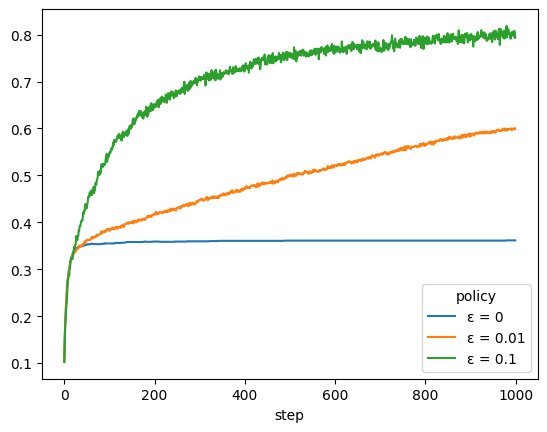

In [6]:
colors = {
    'ε = 0.1': 'tab:blue',
    'ε = 0.01': 'tab:red',
    'ε = 0': 'tab:green'
}

(
    trace_df
    .groupby(['step', 'policy'])
    ['is_action_optimal'].mean()
    .unstack()
    .plot()
)


## Handling drift

The environment used above is a toy situation used for introducing bandits. It is stationary, meaning that the expected reward of each arm does not change over time.

In practice, arms are dynamic, and their performance can vary over time. A simple example of this is the [Candy Cane Contest](https://www.kaggle.com/c/santa-2020) that was hosted on Kaggle in 2020. The expected reward of each arm diminishes each time it is pulled.

The way bandit policies in River deal with drift depends on the method. For the `bandit.EpsilonGreedy` policy, it makes sense to use a rolling average as the reward object. What this means is that the empirical reward the policy calculates for each arm is a rolling average, rather than a global one.

In [7]:
from river import proba, utils

policies=[
    bandit.EpsilonGreedy(
        epsilon=0.1,
        seed=42
    ),
    bandit.EpsilonGreedy(
        epsilon=0.3,
        reward_obj=utils.Rolling(stats.Mean(), window_size=50),
        seed=42
    ),
    bandit.ThompsonSampling(
        reward_obj=proba.Beta(),
        seed=42
    )
]

env = gym.make('river_bandits/CandyCaneContest-v0')

trace = bandit.evaluate(
    policies=policies,
    env=env,
    n_episodes=(n_episodes := 30),
    seed=42
)

trace_df = pd.DataFrame(tqdm(
    trace, position=0, total=(
        n_episodes *
        len(policies) *
        env._max_episode_steps
    )
))


  0%|          | 0/180000 [00:00<?, ?it/s]

  0%|          | 156/180000 [00:00<01:55, 1558.38it/s]

  1%|          | 944/180000 [00:00<00:33, 5273.32it/s]

  1%|          | 1688/180000 [00:00<00:28, 6261.58it/s]

  1%|▏         | 2436/180000 [00:00<00:26, 6742.09it/s]

  2%|▏         | 3183/180000 [00:00<00:25, 7003.01it/s]

  2%|▏         | 3884/180000 [00:00<00:25, 6775.36it/s]

  3%|▎         | 4626/180000 [00:00<00:25, 6977.43it/s]

  3%|▎         | 5367/180000 [00:00<00:24, 7110.57it/s]

  3%|▎         | 6080/180000 [00:00<00:25, 6917.94it/s]

  4%|▍         | 6873/180000 [00:01<00:23, 7219.34it/s]

  4%|▍         | 7608/180000 [00:01<00:23, 7253.13it/s]

  5%|▍         | 8343/180000 [00:01<00:23, 7280.37it/s]

  5%|▌         | 9081/180000 [00:01<00:23, 7307.71it/s]

  5%|▌         | 9821/180000 [00:01<00:23, 7335.30it/s]

  6%|▌         | 10556/180000 [00:01<00:23, 7306.25it/s]

  6%|▋         | 11288/180000 [00:01<00:23, 7091.21it/s]

  7%|▋         | 11999/180000 [00:01<00:23, 7060.48it/s]

  7%|▋         | 12707/180000 [00:01<00:23, 7039.25it/s]

  7%|▋         | 13440/180000 [00:01<00:23, 7123.12it/s]

  8%|▊         | 14163/180000 [00:02<00:23, 7150.38it/s]

  8%|▊         | 14892/180000 [00:02<00:22, 7191.34it/s]

  9%|▊         | 15621/180000 [00:02<00:22, 7220.72it/s]

  9%|▉         | 16353/180000 [00:02<00:22, 7246.61it/s]

  9%|▉         | 17079/180000 [00:02<00:22, 7249.21it/s]

 10%|▉         | 17805/180000 [00:02<00:22, 7205.06it/s]

 10%|█         | 18526/180000 [00:02<00:22, 7063.50it/s]

 11%|█         | 19234/180000 [00:02<00:23, 6870.93it/s]

 11%|█         | 19974/180000 [00:02<00:22, 7020.63it/s]

 12%|█▏        | 20706/180000 [00:02<00:22, 7108.29it/s]

 12%|█▏        | 21442/180000 [00:03<00:22, 7181.37it/s]

 12%|█▏        | 22179/180000 [00:03<00:21, 7237.05it/s]

 13%|█▎        | 22918/180000 [00:03<00:21, 7281.71it/s]

 13%|█▎        | 23652/180000 [00:03<00:21, 7296.24it/s]

 14%|█▎        | 24383/180000 [00:03<00:21, 7138.45it/s]

 14%|█▍        | 25131/180000 [00:03<00:21, 7234.44it/s]

 14%|█▍        | 25863/180000 [00:03<00:21, 7254.85it/s]

 15%|█▍        | 26590/180000 [00:03<00:22, 6946.15it/s]

 15%|█▌        | 27312/180000 [00:03<00:21, 7023.66it/s]

 16%|█▌        | 28035/180000 [00:03<00:21, 7074.70it/s]

 16%|█▌        | 28761/180000 [00:04<00:21, 7126.70it/s]

 16%|█▋        | 29484/180000 [00:04<00:21, 7153.38it/s]

 17%|█▋        | 30201/180000 [00:04<00:21, 6969.50it/s]

 17%|█▋        | 30978/180000 [00:04<00:20, 7199.68it/s]

 18%|█▊        | 31722/180000 [00:04<00:20, 7264.84it/s]

 18%|█▊        | 32450/180000 [00:04<00:20, 7043.23it/s]

 18%|█▊        | 33164/180000 [00:04<00:20, 7070.53it/s]

 19%|█▉        | 33873/180000 [00:04<00:21, 6947.18it/s]

 19%|█▉        | 34605/180000 [00:04<00:20, 7048.97it/s]

 20%|█▉        | 35334/180000 [00:05<00:20, 7116.37it/s]

 20%|██        | 36047/180000 [00:05<00:20, 6875.98it/s]

 20%|██        | 36837/180000 [00:05<00:19, 7167.17it/s]

 21%|██        | 37578/180000 [00:05<00:19, 7236.60it/s]

 21%|██▏       | 38322/180000 [00:05<00:19, 7295.39it/s]

 22%|██▏       | 39069/180000 [00:05<00:19, 7346.06it/s]

 22%|██▏       | 39817/180000 [00:05<00:18, 7385.46it/s]

 23%|██▎       | 40563/180000 [00:05<00:18, 7403.14it/s]

 23%|██▎       | 41304/180000 [00:05<00:19, 7107.98it/s]

 23%|██▎       | 42018/180000 [00:05<00:19, 6900.32it/s]

 24%|██▍       | 42813/180000 [00:06<00:19, 7197.88it/s]

 24%|██▍       | 43548/180000 [00:06<00:18, 7241.92it/s]

 25%|██▍       | 44277/180000 [00:06<00:18, 7250.38it/s]

 25%|██▌       | 45012/180000 [00:06<00:18, 7276.82it/s]

 25%|██▌       | 45741/180000 [00:06<00:18, 7275.23it/s]

 26%|██▌       | 46470/180000 [00:06<00:18, 7278.01it/s]

 26%|██▌       | 47199/180000 [00:06<00:18, 7271.78it/s]

 27%|██▋       | 47927/180000 [00:06<00:18, 7271.29it/s]

 27%|██▋       | 48655/180000 [00:06<00:18, 7134.95it/s]

 27%|██▋       | 49383/180000 [00:06<00:18, 7169.93it/s]

 28%|██▊       | 50101/180000 [00:07<00:18, 7167.38it/s]

 28%|██▊       | 50828/180000 [00:07<00:17, 7197.16it/s]

 29%|██▊       | 51549/180000 [00:07<00:17, 7191.54it/s]

 29%|██▉       | 52275/180000 [00:07<00:17, 7207.21it/s]

 29%|██▉       | 53003/180000 [00:07<00:17, 7228.49it/s]

 30%|██▉       | 53726/180000 [00:07<00:17, 7218.54it/s]

 30%|███       | 54448/180000 [00:07<00:17, 7061.59it/s]

 31%|███       | 55182/180000 [00:07<00:17, 7137.91it/s]

 31%|███       | 55897/180000 [00:07<00:18, 6863.45it/s]

 31%|███▏      | 56616/180000 [00:07<00:17, 6955.12it/s]

 32%|███▏      | 57339/180000 [00:08<00:17, 7035.34it/s]

 32%|███▏      | 58062/180000 [00:08<00:17, 7091.57it/s]

 33%|███▎      | 58785/180000 [00:08<00:17, 7126.30it/s]

 33%|███▎      | 59509/180000 [00:08<00:16, 7159.63it/s]

 33%|███▎      | 60226/180000 [00:08<00:17, 6957.88it/s]

 34%|███▍      | 60984/180000 [00:08<00:16, 7135.09it/s]

 34%|███▍      | 61710/180000 [00:08<00:16, 7171.28it/s]

 35%|███▍      | 62440/180000 [00:08<00:16, 7208.02it/s]

 35%|███▌      | 63171/180000 [00:08<00:16, 7237.35it/s]

 36%|███▌      | 63909/180000 [00:08<00:15, 7276.37it/s]

 36%|███▌      | 64638/180000 [00:09<00:15, 7279.61it/s]

 36%|███▋      | 65374/180000 [00:09<00:15, 7302.36it/s]

 37%|███▋      | 66105/180000 [00:09<00:16, 7044.77it/s]

 37%|███▋      | 66877/180000 [00:09<00:15, 7241.33it/s]

 38%|███▊      | 67604/180000 [00:09<00:15, 7243.49it/s]

 38%|███▊      | 68330/180000 [00:09<00:15, 7243.82it/s]

 38%|███▊      | 69056/180000 [00:09<00:15, 7241.02it/s]

 39%|███▉      | 69781/180000 [00:09<00:15, 7240.48it/s]

 39%|███▉      | 70506/180000 [00:09<00:15, 6930.26it/s]

 40%|███▉      | 71233/180000 [00:10<00:15, 7028.34it/s]

 40%|███▉      | 71964/180000 [00:10<00:15, 7107.74it/s]

 40%|████      | 72677/180000 [00:10<00:15, 7041.83it/s]

 41%|████      | 73419/180000 [00:10<00:14, 7150.17it/s]

 41%|████      | 74157/180000 [00:10<00:14, 7213.72it/s]

 42%|████▏     | 74886/180000 [00:10<00:14, 7235.44it/s]

 42%|████▏     | 75619/180000 [00:10<00:14, 7263.08it/s]

 42%|████▏     | 76347/180000 [00:10<00:14, 7264.18it/s]

 43%|████▎     | 77077/180000 [00:10<00:14, 7274.16it/s]

 43%|████▎     | 77808/180000 [00:10<00:14, 7278.52it/s]

 44%|████▎     | 78537/180000 [00:11<00:14, 7148.19it/s]

 44%|████▍     | 79253/180000 [00:11<00:15, 6474.31it/s]

 44%|████▍     | 79947/180000 [00:11<00:15, 6602.20it/s]

 45%|████▍     | 80660/180000 [00:11<00:14, 6751.09it/s]

 45%|████▌     | 81379/180000 [00:11<00:14, 6876.91it/s]

 46%|████▌     | 82113/180000 [00:11<00:13, 7007.62it/s]

 46%|████▌     | 82842/180000 [00:11<00:13, 7086.14it/s]

 46%|████▋     | 83575/180000 [00:11<00:13, 7157.30it/s]

 47%|████▋     | 84294/180000 [00:11<00:13, 7013.23it/s]

 47%|████▋     | 85053/180000 [00:11<00:13, 7177.16it/s]

 48%|████▊     | 85781/180000 [00:12<00:13, 7207.24it/s]

 48%|████▊     | 86505/180000 [00:12<00:12, 7214.10it/s]

 48%|████▊     | 87228/180000 [00:12<00:12, 7206.44it/s]

 49%|████▉     | 87950/180000 [00:12<00:12, 7203.77it/s]

 49%|████▉     | 88671/180000 [00:12<00:12, 7203.00it/s]

 50%|████▉     | 89392/180000 [00:12<00:12, 7197.35it/s]

 50%|█████     | 90112/180000 [00:12<00:12, 6958.89it/s]

 50%|█████     | 90882/180000 [00:12<00:12, 7171.75it/s]

 51%|█████     | 91620/180000 [00:12<00:12, 7231.03it/s]

 51%|█████▏    | 92358/180000 [00:12<00:12, 7272.41it/s]

 52%|█████▏    | 93087/180000 [00:13<00:11, 7266.83it/s]

 52%|█████▏    | 93820/180000 [00:13<00:11, 7285.27it/s]

 53%|█████▎    | 94553/180000 [00:13<00:11, 7297.65it/s]

 53%|█████▎    | 95286/180000 [00:13<00:11, 7302.77it/s]

 53%|█████▎    | 96017/180000 [00:13<00:11, 7003.71it/s]

 54%|█████▍    | 96816/180000 [00:13<00:11, 7287.55it/s]

 54%|█████▍    | 97548/180000 [00:13<00:11, 7278.37it/s]

 55%|█████▍    | 98278/180000 [00:13<00:11, 7283.11it/s]

 55%|█████▌    | 99013/180000 [00:13<00:11, 7301.67it/s]

 55%|█████▌    | 99745/180000 [00:14<00:11, 7154.58it/s]

 56%|█████▌    | 100462/180000 [00:14<00:11, 7019.25it/s]

 56%|█████▌    | 101187/180000 [00:14<00:11, 7081.38it/s]

 57%|█████▋    | 101918/180000 [00:14<00:10, 7147.50it/s]

 57%|█████▋    | 102634/180000 [00:14<00:10, 7047.89it/s]

 57%|█████▋    | 103362/180000 [00:14<00:10, 7114.39it/s]

 58%|█████▊    | 104085/180000 [00:14<00:10, 7147.51it/s]

 58%|█████▊    | 104802/180000 [00:14<00:10, 7151.54it/s]

 59%|█████▊    | 105523/180000 [00:14<00:10, 7168.27it/s]

 59%|█████▉    | 106245/180000 [00:14<00:10, 7183.41it/s]

 59%|█████▉    | 106964/180000 [00:15<00:10, 7178.82it/s]

 60%|█████▉    | 107685/180000 [00:15<00:10, 7185.70it/s]

 60%|██████    | 108404/180000 [00:15<00:10, 7026.41it/s]

 61%|██████    | 109140/180000 [00:15<00:09, 7119.26it/s]

 61%|██████    | 109869/180000 [00:15<00:09, 7165.22it/s]

 61%|██████▏   | 110590/180000 [00:15<00:09, 7178.50it/s]

 62%|██████▏   | 111309/180000 [00:15<00:09, 7168.67it/s]

 62%|██████▏   | 112050/180000 [00:15<00:09, 7234.59it/s]

 63%|██████▎   | 112791/180000 [00:15<00:09, 7280.96it/s]

 63%|██████▎   | 113520/180000 [00:15<00:09, 7250.00it/s]

 63%|██████▎   | 114246/180000 [00:16<00:09, 7066.80it/s]

 64%|██████▍   | 114971/180000 [00:16<00:09, 7119.77it/s]

 64%|██████▍   | 115699/180000 [00:16<00:08, 7166.76it/s]

 65%|██████▍   | 116426/180000 [00:16<00:08, 7197.16it/s]

 65%|██████▌   | 117154/180000 [00:16<00:08, 7220.99it/s]

 65%|██████▌   | 117879/180000 [00:16<00:08, 7225.16it/s]

 66%|██████▌   | 118608/180000 [00:16<00:08, 7239.39it/s]

 66%|██████▋   | 119333/180000 [00:16<00:08, 7242.02it/s]

 67%|██████▋   | 120058/180000 [00:16<00:08, 6969.13it/s]

 67%|██████▋   | 120857/180000 [00:16<00:08, 7266.52it/s]

 68%|██████▊   | 121597/180000 [00:17<00:07, 7305.41it/s]

 68%|██████▊   | 122330/180000 [00:17<00:07, 7301.02it/s]

 68%|██████▊   | 123066/180000 [00:17<00:07, 7314.48it/s]

 69%|██████▉   | 123809/180000 [00:17<00:07, 7348.66it/s]

 69%|██████▉   | 124548/180000 [00:17<00:07, 7360.84it/s]

 70%|██████▉   | 125285/180000 [00:17<00:07, 7362.35it/s]

 70%|███████   | 126022/180000 [00:17<00:07, 7040.88it/s]

 70%|███████   | 126823/180000 [00:17<00:07, 7321.72it/s]

 71%|███████   | 127559/180000 [00:17<00:07, 7322.02it/s]

 71%|███████▏  | 128294/180000 [00:17<00:07, 7298.03it/s]

 72%|███████▏  | 129026/180000 [00:18<00:06, 7303.23it/s]

 72%|███████▏  | 129758/180000 [00:18<00:06, 7264.67it/s]

 72%|███████▏  | 130486/180000 [00:18<00:06, 7254.85it/s]

 73%|███████▎  | 131215/180000 [00:18<00:06, 7263.92it/s]

 73%|███████▎  | 131949/180000 [00:18<00:06, 7282.28it/s]

 74%|███████▎  | 132678/180000 [00:18<00:06, 7140.79it/s]

 74%|███████▍  | 133404/180000 [00:18<00:06, 7175.51it/s]

 75%|███████▍  | 134127/180000 [00:18<00:06, 7190.43it/s]

 75%|███████▍  | 134849/180000 [00:18<00:06, 7198.98it/s]

 75%|███████▌  | 135571/180000 [00:18<00:06, 7205.15it/s]

 76%|███████▌  | 136292/180000 [00:19<00:06, 7199.50it/s]

 76%|███████▌  | 137013/180000 [00:19<00:06, 6896.89it/s]

 77%|███████▋  | 137737/180000 [00:19<00:06, 6995.54it/s]

 77%|███████▋  | 138439/180000 [00:19<00:06, 6917.59it/s]

 77%|███████▋  | 139179/180000 [00:19<00:05, 7053.02it/s]

 78%|███████▊  | 139911/180000 [00:19<00:05, 7130.27it/s]

 78%|███████▊  | 140646/180000 [00:19<00:05, 7193.11it/s]

 79%|███████▊  | 141378/180000 [00:19<00:05, 7227.12it/s]

 79%|███████▉  | 142110/180000 [00:19<00:05, 7252.82it/s]

 79%|███████▉  | 142842/180000 [00:20<00:05, 7266.64it/s]

 80%|███████▉  | 143576/180000 [00:20<00:04, 7287.41it/s]

 80%|████████  | 144305/180000 [00:20<00:05, 7019.63it/s]

 81%|████████  | 145059/180000 [00:20<00:04, 7169.38it/s]

 81%|████████  | 145794/180000 [00:20<00:04, 7219.59it/s]

 81%|████████▏ | 146528/180000 [00:20<00:04, 7255.07it/s]

 82%|████████▏ | 147264/180000 [00:20<00:04, 7280.07it/s]

 82%|████████▏ | 147997/180000 [00:20<00:04, 7294.88it/s]

 83%|████████▎ | 148731/180000 [00:20<00:04, 7305.15it/s]

 83%|████████▎ | 149463/180000 [00:20<00:04, 7305.32it/s]

 83%|████████▎ | 150194/180000 [00:21<00:04, 7071.50it/s]

 84%|████████▍ | 150972/180000 [00:21<00:03, 7273.23it/s]

 84%|████████▍ | 151710/180000 [00:21<00:03, 7303.88it/s]

 85%|████████▍ | 152448/180000 [00:21<00:03, 7320.54it/s]

 85%|████████▌ | 153183/180000 [00:21<00:03, 7327.14it/s]

 86%|████████▌ | 153918/180000 [00:21<00:03, 7330.62it/s]

 86%|████████▌ | 154652/180000 [00:21<00:03, 7311.30it/s]

 86%|████████▋ | 155384/180000 [00:21<00:03, 7302.28it/s]

 87%|████████▋ | 156115/180000 [00:21<00:03, 7045.57it/s]

 87%|████████▋ | 156903/180000 [00:21<00:03, 7288.66it/s]

 88%|████████▊ | 157634/180000 [00:22<00:03, 7289.19it/s]

 88%|████████▊ | 158365/180000 [00:22<00:02, 7268.35it/s]

 88%|████████▊ | 159093/180000 [00:22<00:02, 7207.10it/s]

 89%|████████▉ | 159815/180000 [00:22<00:02, 7190.30it/s]

 89%|████████▉ | 160535/180000 [00:22<00:02, 7181.89it/s]

 90%|████████▉ | 161254/180000 [00:22<00:02, 7168.22it/s]

 90%|████████▉ | 161972/180000 [00:22<00:02, 7168.34it/s]

 90%|█████████ | 162690/180000 [00:22<00:02, 7039.15it/s]

 91%|█████████ | 163428/180000 [00:22<00:02, 7133.67it/s]

 91%|█████████ | 164160/180000 [00:22<00:02, 7184.97it/s]

 92%|█████████▏| 164879/180000 [00:23<00:02, 7170.95it/s]

 92%|█████████▏| 165603/180000 [00:23<00:02, 7189.42it/s]

 92%|█████████▏| 166329/180000 [00:23<00:01, 7205.11it/s]

 93%|█████████▎| 167052/180000 [00:23<00:01, 7207.60it/s]

 93%|█████████▎| 167784/180000 [00:23<00:01, 7236.52it/s]

 94%|█████████▎| 168508/180000 [00:23<00:01, 7095.78it/s]

 94%|█████████▍| 169239/180000 [00:23<00:01, 7156.57it/s]

 94%|█████████▍| 169968/180000 [00:23<00:01, 7190.61it/s]

 95%|█████████▍| 170697/180000 [00:23<00:01, 7213.53it/s]

 95%|█████████▌| 171419/180000 [00:23<00:01, 7210.13it/s]

 96%|█████████▌| 172141/180000 [00:24<00:01, 7199.13it/s]

 96%|█████████▌| 172862/180000 [00:24<00:00, 7191.00it/s]

 96%|█████████▋| 173582/180000 [00:24<00:00, 7176.66it/s]

 97%|█████████▋| 174300/180000 [00:24<00:00, 7000.66it/s]

 97%|█████████▋| 175056/180000 [00:24<00:00, 7161.68it/s]

 98%|█████████▊| 175794/180000 [00:24<00:00, 7223.90it/s]

 98%|█████████▊| 176540/180000 [00:24<00:00, 7292.90it/s]

 98%|█████████▊| 177287/180000 [00:24<00:00, 7345.24it/s]

 99%|█████████▉| 178029/180000 [00:24<00:00, 7364.23it/s]

 99%|█████████▉| 178767/180000 [00:24<00:00, 7367.38it/s]

100%|█████████▉| 179508/180000 [00:25<00:00, 7377.44it/s]

100%|██████████| 180000/180000 [00:25<00:00, 7158.72it/s]

We can compare the performance of each policy by checking the average reward at the end of each episode.

In [8]:
(
    trace_df
    .groupby(['policy_idx', 'episode'])
    .last()
    .groupby('policy_idx')
    .reward_stat.mean()
)



policy_idx
0    736.1
1    817.0
2    854.0
Name: reward_stat, dtype: float64

We see that using a rolling average gives a boost to the epsilon greedy strategy. However, we see that the `bandit.ThompsonSampling` policy performs even better, even though no particular care was given to drift. A natural next step would thus be to see how it could be improved to handle drift. For instance, its `dist` parameter could be wrapped with a `utils.Rolling`:

In [9]:
policy = bandit.ThompsonSampling(
    reward_obj=utils.Rolling(proba.Beta(), window_size=50),
    seed=42
)


Bandits can be used for several tasks. They can be used for content personalization, as well as online model selection (see `model_selection.BanditRegressor`). The policies in River are therefore designed to be flexible, so that they can be used in conjunction with other River modules. For instance, the `reward_obj` in `bandit.EpsilonGreedy` can be a metric, a probability distribution, or a statistic. This works because objects in River adher to a coherent get/update interface.